# **1. Business Understanding / Бизнес-анализ: описание кейса**

![](https://img.freepik.com/free-vector/modern-desktop-compute-concept-illustration_114360-12156.jpg?t=st=1727462081~exp=1727465681~hmac=5dc4678f2128b1913fcfaad3b4c0ccbddb05725aa9a931c99c6f6f6e0cb171a2&w=500)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/modern-desktop-compute-concept-illustration_32318414.htm#fromView=search&page=1&position=0&uuid=079f19a3-42d1-422a-8e7f-9b1680fd2d0a">Изображение от storyset на Freepik</a></font>

> К нам обратился клиент, который занимается сборкой и продажей персональных компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п., за последние несколько лет, а также с целью привлечения большего числа клиентов при одновременном снижении затрат на содержание собственного магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайн-рынок в ближайшие 3 месяца. В связи с этим клиент хотел бы узнать, от чего зависит цена, а также популярность персональных компьютеров, выкладываемых на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные по техническим характеристикам компьютеры и продавать их по конкурентной цене.
<br> Специалистом по сбору данных были выгружены датасеты с одного из популярных онлайн-магазинов, содержащие информацию о товарах категории «Компьютеры и моноблоки», в формате csv.
<br> Проанализируйте полученные данные и представьте аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач.

**Наша задача** — проанализировать полученные данные и представить аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач. Выявить зависимость цены и популярности единицы товара (количество продаж) от комплектующих (за исключением мини-ПК и моноблоков)

Какая **информация важна** для нашего исследования:
1. product_id (int64) идентификатор товара
2. title (object) наименование товара
3. price (object) стоимость товара (значение обязательно должно быть указано, товары с неуказанным значением стоимости необходимо исключить; значения должны быть соизмеримы, т.е. указаны в единой валюте)
3. sales (object) количество продаж товара
4. Процессор (object)
5. Оперативная память (object)
6. Жесткий диск (object)
7. Видеопроцессор (object)
8. Операционная система (object)


**Формат файла** по результатам предобработки: *xlsx* или *csv*

Основные пункты проработанного дизайна исследования представлены в **карточке проекта**.

# **2. Data Understanding / Изучение данных**

## 2.1. Импорт библиотек

In [ ]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
# from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns
# импортируем модуль files для подгрузки датасета с ПК
from google.colab import files
# импортируем библиотеку re
import re

In [ ]:
# установим размер графиков
sns.set(rc={'figure.figsize':(8,4)})

## 2.2. Подгрузка файла

**1 способ:** подгрузка файла в среду выполнения кода Colab с google диска

https://drive.google.com/file/d/1hAKgiAlDGzH8njfKRKs-mj_XQLHfYb-c/view?usp=share_link

In [ ]:
# при ошибке загрузки в текущей версии gdown необходимо его обновить
# !pip install --upgrade gdown

In [ ]:
# !gdown --id 1hAKgiAlDGzH8njfKRKs-mj_XQLHfYb-c

**2 способ:** подгрузка файла в среду выполнения кода Colab с персонального компьютера

In [ ]:
uploaded = files.upload()
#files.upload()

Saving wb_pc_hard.csv to wb_pc_hard.csv


## 2.3. Чтение файла

In [ ]:
df = pd.read_csv('wb_pc_hard.csv')

Параметр *sep* не указываем, т.к. по умолчанию sep=',' (что соответствует используемому разделителю в нашем файле)

## 2.4. Обзор датасета

In [ ]:
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [ ]:
df.shape

(4500, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## 2.5. Выявление проблем

1. Наличие признаков, не представляющих ценности в рамках кейса ('feedbacks', 'seller', 'seller_rating', 'Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)')
2. Возможно наличие дубликатов
3. Наличие незаполненных значений ('price', 'sales')
4. Наличие вложенных значений (списков словарей по признакам 'Процессор', 'Оперативная память', 'Жесткий диск'), которые необходимо преобразовать в отдельные столбцы для возможности анализа. Столбцы 'Оперативная память'и 'Жесткий диск' содержат пропуски None, которые необходимо преобразовать.
5. Приведение признаков в необходимый формат (в int: 'price')
6. Необходимость приведения признака 'sales' к единому формату прочтения (переименовать некоторые значения)[возможно]
7. Исключение в признаке 'title' значений 'мини-ПК' и 'моноблок' при наличии
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

# **3. Data Preparation / Предобработка данных**

## 3.1. Исключение признаков, не представляющих ценности в рамках кейса

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)'],
      dtype='object')

In [ ]:
# создание списка "ненужных" колонок
columns = ['feedbacks', 'seller', 'seller_rating', 'Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)']

In [ ]:
# исключим "ненужные" колонки
df_copy.drop(columns=columns, inplace=True)

In [ ]:
# проверка списка колонок датафрейма
df_copy.columns

Index(['product_id', 'title', 'price', 'sales', 'Процессор',
       'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система'],
      dtype='object')

## 3.2. Проверка и исключение дубликатов

In [ ]:
df_copy.duplicated().sum()

490

In [ ]:
# проверка дубликатов по столбцу id
df_copy.duplicated(subset='product_id').sum()

490

In [ ]:
# исключение дубликатов по всем признакам датафрейма
df_copy.drop_duplicates(inplace=True)

In [ ]:
# контроль размеров датафрейма
df_copy.shape

(4010, 9)

## 3.3. Обработка пропущенных значений

In [ ]:
df_copy.isna().sum()

,0
product_id,0
title,0
price,1
sales,2975
Процессор,0
Оперативная память,0
Жесткий диск,0
Видеопроцессор,0
Операционная система,0


**Обзор пропущенных значений** по признакам:
1. 'price' - стоимость, отсутствует всего одно значение, им можно пренебречь и исключить всю строку, восстановить пропуски нет возможности
2. 'sales' - количество проданных моделей, отсутсвует более половины значений, восстановить пропуски нет возможности, необходимо оценить количество уникальных значений


In [ ]:
# Найдем индекс строки с отсутствующим значением в столбце 'price'
df_copy.index[df_copy['price'].isnull()]
# Удалим данную строку с отсутствующим значением по индексу вместе со строками, содержащими в названии "моноблок" и "мини" (в столбце 'title')

Index([1916], dtype='int64')

In [ ]:
df_copy.loc[[1916]]

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
1916,141714708,Системный блок Azerty AZ-0102,NaN,Купили более 10 раз,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb,Windows 10 Pro


In [ ]:
# Попытаемся восстановить цену, если найдем сборку с аналогичным именем и параметрами:
df_copy.loc[df_copy.title == 'Системный блок Azerty AZ-0102']

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
1916,141714708,Системный блок Azerty AZ-0102,NaN,Купили более 10 раз,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb,Windows 10 Pro


In [ ]:
# Наименование сборки 'Системный блок Azerty AZ-0102' (Index([1916]) с отсутствующей ценой в датасете присутствует один раз, значит восстановить цену не получится.
# Удалим данную строку с отсутствующим значением по индексу
df_copy = df_copy.drop([1916])

## 3.3.1. Исключение наблюдений, содержащих в названии "моноблок" и "мини" (в столбце 'title')

In [ ]:
# подсчитаем количество наименований, в которых встречается слово "моно" или "мини" вне зависимости от регистра
len(df_copy[df_copy['title'].str.contains("(?i)моно")])+len(df_copy[df_copy['title'].str.contains("(?i)мини")])
#Таких значений всего 127

127

In [ ]:
# исключим строки, в которых встречается слово "моно" используя маску
mask = df_copy['title'].str.contains("(?i)моно")
df_copy = df_copy[~mask]

In [ ]:
# исключим строки, в которых встречается слово "мини" используя drop
df_copy = df_copy.drop(df_copy[df_copy['title'].str.contains("(?i)мини")].index)

In [ ]:
# проверим датасет на наличие "моноблоков" или "мини ПК"
df_copy[df_copy['title'].str.contains("(?i)мини")]

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система


In [ ]:
# перезапишем индексный столбец
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
# проверка диапазона индексов
df_copy.index

RangeIndex(start=0, stop=3882, step=1)

## 3.4. Распаковка вложенных структур данных

### **Обработка столбца 'sales' - количество продаж**

In [ ]:
df_copy.head(3)

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует


In [ ]:
df_copy['sales'].unique()

array(['Купили более 400 раз', nan, 'Купили более 10 раз',
       'Купили более 200 раз', 'Купили более 40 раз',
       'Купили более 5 раз', 'Купили более 30 раз', 'Купили более 20 раз',
       'Купили более 50 раз', 'Купили менее 5 раз',
       'Купили более 500 раз', 'Купили более 100 раз',
       'Купили более 80 раз', 'Купили более 800 раз',
       'Купили более 90 раз', 'Купили более 300 раз',
       'Купили более 60 раз', 'Купили более 70 раз',
       'Купили более 5\xa0200 раз'], dtype=object)

In [ ]:
len(df_copy['sales'].unique())
#В столбце 'sales' 19 уникальных значений помимо пропусков

19

In [ ]:
# Подсчитаем как часто встречается в датасете каждое из уникальных значений
df_copy['sales'].value_counts()

,count
sales,
Купили менее 5 раз,539
Купили более 5 раз,165
Купили более 10 раз,105
Купили более 20 раз,48
Купили более 40 раз,22
Купили более 30 раз,20
Купили более 100 раз,20
Купили более 200 раз,13
Купили более 50 раз,11


In [ ]:
# Оценим наблюдение с некорректным значением 'Купили более 5\xa0200 раз'
df_copy[df_copy['sales']=='Купили более 5\xa0200 раз']


,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
670,90081446,Блок питания 12вольт 2 ампер Сетевой блок,232₽,Купили более 5 200 раз,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует


In [ ]:
df_copy.loc[670]

,670
product_id,90081446
title,Блок питания 12вольт 2 ампер Сетевой блок
price,232₽
sales,Купили более 5 200 раз
Процессор,"{'Процессор_тип': 'не заполнено', 'Количество ..."
Оперативная память,"{'Тип оперативной памяти': 'не заполнено', 'Об..."
Жесткий диск,"{'Объем накопителя HDD': None, 'Объем накопите..."
Видеопроцессор,не заполнено
Операционная система,отсутствует


In [ ]:
# судя по наименованию позиции 'Купили более 5\xa0200 раз' в 'title' это не копьютерная сборка, а отдельный блок питания, что не соответствует заданию и нужно исключить это наблюдение

df_copy=df_copy[df_copy.sales != 'Купили более 5\xa0200 раз']
df_copy.shape

(3881, 9)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3881 entries, 0 to 3881
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            3881 non-null   int64 
 1   title                 3881 non-null   object
 2   price                 3881 non-null   object
 3   sales                 976 non-null    object
 4   Процессор             3881 non-null   object
 5   Оперативная память    3881 non-null   object
 6   Жесткий диск          3881 non-null   object
 7   Видеопроцессор        3881 non-null   object
 8   Операционная система  3881 non-null   object
dtypes: int64(1), object(8)
memory usage: 303.2+ KB


In [ ]:
df_copy.head()

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная


In [ ]:
# переименуем название столбца
# контроль результата и оценка количества каждого инмкального значения
df_copy.rename(columns = {'sales': 'Количество_продаж'}, inplace = True)
df_copy['Количество_продаж'].value_counts()

,count
Количество_продаж,
Купили менее 5 раз,539
Купили более 5 раз,165
Купили более 10 раз,105
Купили более 20 раз,48
Купили более 40 раз,22
Купили более 30 раз,20
Купили более 100 раз,20
Купили более 200 раз,13
Купили более 50 раз,11


**Необходимо обработать словари:** 'Процессор', 'Оперативная память', 'Жесткий диск', а также трансформировать 'price' (убрать знак валюты)

### **Обработка столбца 'price' - цена единицы товара**

In [ ]:
# необходимо записать данные о цене, и о валюте в отдельные столбцы
# данные не содержат пустые значения, единственный пропуск мы уже исключили
df_copy.head(3)

,product_id,title,price,Количество_продаж,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует


In [ ]:
# оценим формат значений в столбце 'price'
df_copy.price

,price
0,10805₽
1,32900₽
2,35720₽
3,39237₽
4,76188₽
...,...
3877,70000₽
3878,70000₽
3879,70000₽
3880,70000₽


In [ ]:
df_copy.head(3)

,product_id,title,price,Количество_продаж,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует


In [ ]:
df_copy['price'].unique()

array(['10805₽', '32900₽', '35720₽', ..., '21988₽', '4219₽', '77250₽'],
      dtype=object)

In [ ]:
df_copy['price'] = df_copy['price'].astype("string")

In [ ]:
df_copy.price

,price
0,10805₽
1,32900₽
2,35720₽
3,39237₽
4,76188₽
...,...
3877,70000₽
3878,70000₽
3879,70000₽
3880,70000₽


In [ ]:
# проверим столбец 'price' на наличие наименования валюты отличной от рубля '₽'
df_copy[df_copy['price'].str.contains('!="₽"')]

,product_id,title,price,Количество_продаж,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система


In [ ]:
# отличных от '₽' валют не обнаружено
# исключим в написании знак валюты в столбце 'price', исключив нечисловые значения
def clear_price(price):
    return re.sub('\D', '', price)

df_copy['price'].apply(clear_price)

,price
0,10805
1,32900
2,35720
3,39237
4,76188
...,...
3877,70000
3878,70000
3879,70000
3880,70000


In [ ]:
# создадим столбец clear_price в исходном датасете, применив функцию к признаку price
df_copy['clear_price'] = df_copy['price'].apply(clear_price)

In [ ]:
# контроль результата
df_copy['clear_price']

,clear_price
0,10805
1,32900
2,35720
3,39237
4,76188
...,...
3877,70000
3878,70000
3879,70000
3880,70000


In [ ]:
# исключим исходный столбец price
df_copy.drop(columns='price', inplace=True)

In [ ]:
# переименуем столбец clear_price в price
df_copy.rename(columns={'clear_price': 'price'}, inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['product_id', 'title', 'Количество_продаж', 'Процессор',
       'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'price'],
      dtype='object')

In [ ]:
# контроль результата
df_copy[['price']]

,price
0,10805
1,32900
2,35720
3,39237
4,76188
...,...
3877,70000
3878,70000
3879,70000
3880,70000


In [ ]:
# изменим формат 'price' с object на int
df_copy['price'] = df_copy['price'].astype('Int64')

In [ ]:
# переименуем название столбца и добавим размерность (руб)
# контроль результата
df_copy.rename(columns = {'price': 'Цена_руб'}, inplace = True)
df_copy['Цена_руб']

,Цена_руб
0,10805
1,32900
2,35720
3,39237
4,76188
...,...
3877,70000
3878,70000
3879,70000
3880,70000


### **Обработка столбца 'Процессор' - характеристики процессора**

In [ ]:
# преобразуем данные столбца 'Процессор' в отдельные столбцы его характеристики
df_copy.Процессор

,Процессор
0,"{'Процессор_тип': 'Intel Celeron', 'Количество..."
1,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
2,"{'Процессор_тип': 'не заполнено', 'Количество ..."
3,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
4,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
...,...
3877,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
3878,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
3879,"{'Процессор_тип': 'Intel Core i5', 'Количество..."
3880,"{'Процессор_тип': 'Intel Core i5', 'Количество..."


In [ ]:
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить
df_copy['Процессор'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [ ]:
# создадим функцию не заменяя пропущенные значения другими
def text_to_json_cpu(text):
    if pd.isna(text):
        result = np.nan
    else:
        result = json.loads(text.replace("'", '"'))['Процессор_тип']
    return result

In [ ]:
# применяем функцию к столбцу
df_copy['Тип_процессора'] = df_copy['Процессор'].apply(text_to_json_cpu)

In [ ]:
df_copy.head(3)

,product_id,title,Количество_продаж,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron
1,17877962,Системный блок,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено


In [ ]:
df_copy['Процессор'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [ ]:
def text_to_json_cpu1(text):
    if pd.isna(text):
        result = np.nan
    else:
        result = json.loads(text.replace("'", '"'))['Количество ядер процессора']
    return result

In [ ]:
# применяем функцию к столбцу
df_copy['Количество_ядер'] = df_copy['Процессор'].apply(text_to_json_cpu1)

In [ ]:
# контроль результата
df_copy.Количество_ядер

,Количество_ядер
0,2
1,не заполнено
2,не заполнено
3,6
4,6
...,...
3877,6
3878,6
3879,6
3880,6


In [ ]:
df_copy.head(3)

,product_id,title,Количество_продаж,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron,2
1,17877962,Системный блок,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5,не заполнено
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено,не заполнено


In [ ]:
# исключим исходный столбец 'Процессор'
df_copy.drop(columns='Процессор', inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['product_id', 'title', 'Количество_продаж', 'Оперативная память',
       'Жесткий диск', 'Видеопроцессор', 'Операционная система', 'Цена_руб',
       'Тип_процессора', 'Количество_ядер'],
      dtype='object')

### **Обработка столбца 'Оперативная память' - характеристики оперативной памяти**

In [ ]:
# аналогично распакуем в отдельные столбцы характеристики оперативной памяти
df_copy['Оперативная память']

,Оперативная память
0,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе..."
1,"{'Тип оперативной памяти': 'не заполнено', 'Об..."
2,"{'Тип оперативной памяти': 'не заполнено', 'Об..."
3,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."
4,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."
...,...
3877,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."
3878,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."
3879,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."
3880,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе..."


In [ ]:
df_copy['Оперативная память'][0]

"{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}"

In [ ]:
df_copy.rename(columns = {'Оперативная память': 'ОЗУ'}, inplace = True)
df_copy.head(3)

,product_id,title,Количество_продаж,ОЗУ,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron,2
1,17877962,Системный блок,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5,не заполнено
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено,не заполнено


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3881 entries, 0 to 3881
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            3881 non-null   int64 
 1   title                 3881 non-null   object
 2   Количество_продаж     976 non-null    object
 3   ОЗУ                   3881 non-null   object
 4   Жесткий диск          3881 non-null   object
 5   Видеопроцессор        3881 non-null   object
 6   Операционная система  3881 non-null   object
 7   Цена_руб              3881 non-null   Int64 
 8   Тип_процессора        3881 non-null   object
 9   Количество_ядер       3881 non-null   object
dtypes: Int64(1), int64(1), object(8)
memory usage: 466.4+ KB


In [ ]:
df_copy.head()

,product_id,title,Количество_продаж,ОЗУ,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron,2
1,17877962,Системный блок,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5,не заполнено
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено,не заполнено
3,19347937,Офисный Компьютер Robotcomp Казначей V1,Купили более 10 раз,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,39237,Intel Core i5,6
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Купили более 200 раз,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,76188,Intel Core i5,6


In [ ]:
# данные содержат пустые значения
# перепишем функцию, не заменяя пропущенные значения другими
def text_to_json_ozu1(text):
  if text:
    try:
      result = json.loads(text.replace("'", '"'))['Тип оперативной памяти']
      return result
    except json.JSONDecodeError as e:
      return np.nan

In [ ]:
df_copy['Тип_ОЗУ'] = df_copy['ОЗУ'].apply(text_to_json_ozu1)

In [ ]:
df_copy['Тип_ОЗУ']

,Тип_ОЗУ
0,DDR 3
1,не заполнено
2,не заполнено
3,DDR 4
4,DDR 4
...,...
3877,DDR 4
3878,DDR 4
3879,DDR 4
3880,DDR 4


In [ ]:
df_copy['ОЗУ'][2]

"{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': '16 ГБ'}"

In [ ]:
def text_to_json_ozu2(text):
  if text:
    try:
      result = json.loads(text.replace("'", '"'))['Объем оперативной памяти (Гб)']
      return result
    except json.JSONDecodeError as e:
      return np.nan

In [ ]:
df_copy['Объем_ОЗУ'] = df_copy['ОЗУ'].apply(text_to_json_ozu2)

In [ ]:
df_copy['Объем_ОЗУ'] = df_copy['Объем_ОЗУ'].str.lower()

In [ ]:
df_copy['Объем_ОЗУ']

,Объем_ОЗУ
0,4 гб
1,16 гб
2,16 гб
3,8
4,16
...,...
3877,16 гб
3878,16 гб
3879,16 гб
3880,16 гб


In [ ]:
df_copy['Объем_ОЗУ'].info()

<class 'pandas.core.series.Series'>
Index: 3881 entries, 0 to 3881
Series name: Объем_ОЗУ
Non-Null Count  Dtype 
--------------  ----- 
3482 non-null   object
dtypes: object(1)
memory usage: 189.7+ KB


In [ ]:
# очистим столбец 'Объем оперативной памяти' от нецифровых значений
def clear_ozu_size(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('\s*(gb|гб)', text):
    result = re.sub('\s*(gb|гб)', '', text)
  else: result = text
  return result

In [ ]:
#df_copy['Объем_ОЗУ'] = df_copy['Объем_ОЗУ'].astype(str)

In [ ]:
df_copy['Объем_ОЗУ'] = df_copy['Объем_ОЗУ'].apply(clear_ozu_size)

In [ ]:
df_copy['Объем_ОЗУ']

,Объем_ОЗУ
0,4
1,16
2,16
3,8
4,16
...,...
3877,16
3878,16
3879,16
3880,16


In [ ]:
df_copy.head(3)

,product_id,title,Количество_продаж,ОЗУ,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер,Тип_ОЗУ,Объем_ОЗУ
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron,2,DDR 3,4
1,17877962,Системный блок,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5,не заполнено,не заполнено,16
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено,не заполнено,не заполнено,16


In [ ]:
# исключим исходный столбец 'ОЗУ'
df_copy.drop(columns='ОЗУ', inplace=True)

In [ ]:
# добавим в наименование столбца размерность Гб
# контроль результата
df_copy.rename(columns = {'Объем_ОЗУ': 'Объем_ОЗУ_Гб'}, inplace = True)
df_copy.columns

Index(['product_id', 'title', 'Количество_продаж', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Цена_руб', 'Тип_процессора',
       'Количество_ядер', 'Тип_ОЗУ', 'Объем_ОЗУ_Гб'],
      dtype='object')

### **Обработка столбца 'Жесткий диск' - характеристики жесткого диска**

In [ ]:
# аналогично распакуем в отдельные столбцы характеристики жесткого диска
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3881 entries, 0 to 3881
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            3881 non-null   int64 
 1   title                 3881 non-null   object
 2   Количество_продаж     976 non-null    object
 3   Жесткий диск          3881 non-null   object
 4   Видеопроцессор        3881 non-null   object
 5   Операционная система  3881 non-null   object
 6   Цена_руб              3881 non-null   Int64 
 7   Тип_процессора        3881 non-null   object
 8   Количество_ядер       3881 non-null   object
 9   Тип_ОЗУ               3482 non-null   object
 10  Объем_ОЗУ_Гб          3482 non-null   object
dtypes: Int64(1), int64(1), object(9)
memory usage: 496.7+ KB


In [ ]:
df_copy['Жесткий диск'][0]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}"

In [ ]:
# данные содержат пустые значения
# перепишем функцию, не заменяя пропущенные значения другими
# создадим отдельный столбец "Объем HDD"
def text_to_json_HDD(text):
  if text:
    try:
      result = json.loads(text.replace("'", '"'))['Объем накопителя HDD']
      return result
    except json.JSONDecodeError as e:
      return np.nan

In [ ]:
df_copy['Объем_HDD'] = df_copy['Жесткий диск'].apply(text_to_json_HDD)

In [ ]:
# создадим отдельный столбец "Объем SSD"
def text_to_json_SSD(text):
  if text:
    try:
      result = json.loads(text.replace("'", '"'))['Объем накопителя SSD']
      return result
    except json.JSONDecodeError as e:
      return np.nan

In [ ]:
df_copy['Объем_SSD'] = df_copy['Жесткий диск'].apply(text_to_json_SSD)

In [ ]:
# проверим результат появления двух новых столбцов
df_copy.head(3)

,product_id,title,Количество_продаж,Жесткий диск,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер,Тип_ОЗУ,Объем_ОЗУ_Гб,Объем_HDD,Объем_SSD
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,"{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,10805,Intel Celeron,2,DDR 3,4,NaN,NaN
1,17877962,Системный блок,NaN,"{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,32900,Intel Core i5,не заполнено,не заполнено,16,NaN,NaN
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,"{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,35720,не заполнено,не заполнено,не заполнено,16,NaN,NaN


In [ ]:
# исключим исходный столбец 'Жесткий диск'
df_copy.drop(columns='Жесткий диск', inplace=True)

In [ ]:
# оценим содержимое столбцов 'Объем_HDD' и 'Объем_SSD'
df_copy.Объем_HDD
df_copy.Объем_SSD

,Объем_SSD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3877,500 гб
3878,500 Гб
3879,500 Гб
3880,500 гб


In [ ]:
# преобразуем все буквенные символы к строчному виду
df_copy['Объем_HDD'] = df_copy['Объем_HDD'].str.lower()
df_copy['Объем_SSD'] = df_copy['Объем_SSD'].str.lower()

In [ ]:
# очистим столбец 'Объем_HDD' от нецифровых значений
def clear_HDD(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('\s*(gb|гб)', text):
    result = re.sub('\s*(gb|гб)', '', text)
  else: result = text
  return result

#df_copy['Объем_HDD'] = df_copy['Объем_HDD'].astype(str)
df_copy['Объем_HDD'] = df_copy['Объем_HDD'].apply(clear_HDD)
df_copy['Объем_HDD']

,Объем_HDD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3877,1000
3878,1000
3879,1000
3880,1000


In [ ]:
# очистим столбец 'Объем_SSD' от нецифровых значений
def clear_SSD(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('\s*(gb|гб)', text):
    result = re.sub('\s*(gb|гб)', '', text)
  else: result = text
  return result

#df_copy['Объем_SSD'] = df_copy['Объем_SSD'].astype(str)
df_copy['Объем_SSD'] = df_copy['Объем_SSD'].apply(clear_SSD)
df_copy['Объем_SSD']

,Объем_SSD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3877,500
3878,500
3879,500
3880,500


In [ ]:
# контроль результата
df_copy.columns

Index(['product_id', 'title', 'Количество_продаж', 'Видеопроцессор',
       'Операционная система', 'Цена_руб', 'Тип_процессора', 'Количество_ядер',
       'Тип_ОЗУ', 'Объем_ОЗУ_Гб', 'Объем_HDD', 'Объем_SSD'],
      dtype='object')

In [ ]:
df_copy.head(5)

,product_id,title,Количество_продаж,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер,Тип_ОЗУ,Объем_ОЗУ_Гб,Объем_HDD,Объем_SSD
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,Intel HD Graphics,отсутствует,10805,Intel Celeron,2,DDR 3,4,NaN,NaN
1,17877962,Системный блок,NaN,не заполнено,отсутствует,32900,Intel Core i5,не заполнено,не заполнено,16,NaN,NaN
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,не заполнено,отсутствует,35720,не заполнено,не заполнено,не заполнено,16,NaN,NaN
3,19347937,Офисный Компьютер Robotcomp Казначей V1,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,39237,Intel Core i5,6,DDR 4,8,NaN,NaN
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,76188,Intel Core i5,6,DDR 4,16,NaN,NaN


## 3.5. Преобразование данных в необходимый формат

In [ ]:
df_copy.dtypes

,0
product_id,int64
title,object
Количество_продаж,object
Видеопроцессор,object
Операционная система,object
Цена_руб,Int64
Тип_процессора,object
Количество_ядер,object
Тип_ОЗУ,object
Объем_ОЗУ_Гб,object


**Необходимо преобразовать** следующие признаки:
1. 'Количество_ядер' - в формат целого числа int
2. 'Объем_ОЗУ_Гб' - в формат целого числа int
3. 'Объем_HDD' - в формат числа с плавающей точкой float
4. 'Объем_SSD' - в формат числа с плавающей точкой float

### 'Количество_ядер'

In [ ]:
df_copy.Количество_ядер.unique()

array(['2', 'не заполнено', '6', '10', '4', '12', '16', '8', '2 ядра',
       '6 ядер', '8 Ядер 16 потоков', '4 ядра', '8 ядер', '14', '20',
       '24 ядра'], dtype=object)

In [ ]:
# избавимся от нечисловых символов
def clear_1(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('\s*(ядра|ядер|Ядер|16 потоков|шт|Ядер)', text):
    result = re.sub('\s*(ядра|ядер|Ядер|16 потоков|шт|Ядер)', '', text)
  elif re.findall('не заполнено', text):
    result = re.sub('не заполнено', '0', text)
  else: result = text
  return result
# приэтом заменим отсутствующие значения 'не заполнено' на '0'

In [ ]:
df_copy.Количество_ядер = df_copy.Количество_ядер.apply(clear_1)

In [ ]:
# проверим результат
df_copy.Количество_ядер.unique()

array(['2', '0', '6', '10', '4', '12', '16', '8', '14', '20', '24'],
      dtype=object)

In [ ]:
# вместо классического питоновского типа данных 'int' применим тип данных 'Int64',
# чтобы автоматически обрабатывали пропущенные значения
df_copy.Количество_ядер = df_copy.Количество_ядер.astype('Int64')
df_copy.Количество_ядер

,Количество_ядер
0,2
1,0
2,0
3,6
4,6
...,...
3877,6
3878,6
3879,6
3880,6


### 'Объем_ОЗУ_Гб'

In [ ]:
# оценим уникальные значения в столбце HDD
df_copy.Объем_ОЗУ_Гб.unique()

array(['4', '16', '8', '32', '6', nan, '64', '240', '2', '1000', '1'],
      dtype=object)

In [ ]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
df_copy.Объем_ОЗУ_Гб = pd.to_numeric(df_copy.Объем_ОЗУ_Гб, downcast='float')
df_copy.Объем_ОЗУ_Гб

,Объем_ОЗУ_Гб
0,4.0
1,16.0
2,16.0
3,8.0
4,16.0
...,...
3877,16.0
3878,16.0
3879,16.0
3880,16.0


### 'Объем_HDD'

In [ ]:
# оценим уникальные значения в столбце HDD
df_copy.Объем_HDD.unique()

array([nan, '1000', '2000', '1 тб', '1tb', 'нет', '2tb', '1 tb',
       'нет; без hdd', 'без hdd', '500', '3000', '2 тб', '512',
       'отсутствует', '250', '256', '4000; 4000', '500; 500', '1024'],
      dtype=object)

In [ ]:
# избавимся от нечисловых символов
# заменим значения 'без hdd', 'нет; без hdd', 'отсутствует' и 'нет' на '0'
# заменим дублирующие значения  '4000; 4000' и '500; 500' на '4000' и '500' соответственно
# переведем значения размерностью в тб|tb в значения зразмерностью в Гб (для значений 1 и 2)
# а саму размерность значений исключим
# переведем значения '256' '512' и '1024' к единому округленному виду '250' '500' и '1000' соответственно

def clear_2(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('без hdd|нет; без hdd|отсутствует|нет', text):
    result = re.sub('без hdd|нет; без hdd|отсутствует|нет', '0', text)
  elif re.findall('4000; 4000', text):
    result = re.sub('4000; 4000', '4000', text)
  elif re.findall('500; 500', text):
    result = re.sub('500; 500', '500', text)
  elif re.findall('\s*(тб|tb)', text):
    result = re.sub('\s*(тб|tb)', '000', text)
  elif re.findall('256', text):
    result = re.sub('256', '250', text)
  elif re.findall('512', text):
    result = re.sub('512', '500', text)
  elif re.findall('1024', text):
    result = re.sub('1024', '1000', text)
  else: result = text
  return result

In [ ]:
df_copy.Объем_HDD = df_copy.Объем_HDD.apply(clear_2)

In [ ]:
# проверим результат
df_copy.Объем_HDD.unique()

array([nan, '1000', '2000', '0', '500', '3000', '250', '4000'],
      dtype=object)

In [ ]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
# добавим в наименование столбца размерность Гб
df_copy.Объем_HDD = pd.to_numeric(df_copy.Объем_HDD, downcast='float')
df_copy.rename(columns = {'Объем_HDD': 'Объем_HDD_Гб'}, inplace = True)
df_copy.Объем_HDD_Гб

,Объем_HDD_Гб
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3877,1000.0
3878,1000.0
3879,1000.0
3880,1000.0


### 'Объем_SSD'

In [ ]:
# оценим уникальные значения в столбце HDD
df_copy.Объем_SSD.unique()

array([nan, '512', '1000 pci-e', '240', '480', '256', '120', '500', '128',
       '16', '2 тб', '1000', '960', '250', '1 тб', '2000', '128; 128'],
      dtype=object)

In [ ]:
# избавимся от нечисловых символов, заменим значения 'pci-e' на ''
# заменим дублирующие значения  '128; 128' на '128'
# переведем значения размерностью в тб|tb в значения зразмерностью в Гб (для значений 1 и 2)
# а саму размерность значений тб|tb исключим
# переведем значения '128' '256' и ('960' и '1024') к единому виду '120' '250' и '1000' соответственно

def clear_3(text):
  if pd.isna(text):
    result = np.nan
  elif re.findall('\s*pci-e', text):
    result = re.sub('\s*pci-e', '', text)
  elif re.findall('128; 128', text):
    result = re.sub('128; 128', '120', text)
  elif re.findall('\s*(тб|tb)', text):
    result = re.sub('\s*(тб|tb)', '000', text)
  elif re.findall('128', text):
    result = re.sub('128', '120', text)
  elif re.findall('256', text):
    result = re.sub('256', '250', text)
  elif re.findall('512', text):
    result = re.sub('512', '500', text)
  elif re.findall('960', text):
    result = re.sub('960', '1000', text)
  elif re.findall('480', text):
    result = re.sub('480', '500', text)
  elif re.findall('16', text):
    result = re.sub('16', '1000', text)
  elif re.findall('240', text):
    result = re.sub('240', '250', text)
  else: result = text
  return result

In [ ]:
df_copy.Объем_SSD = df_copy.Объем_SSD.apply(clear_3)

In [ ]:
# проверим результат
df_copy.Объем_SSD.unique()

array([nan, '500', '1000', '250', '120', '2000'], dtype=object)

In [ ]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
# добавим в наименование столбца размерность Гб
df_copy.Объем_SSD = pd.to_numeric(df_copy.Объем_SSD, downcast='float')
df_copy.rename(columns = {'Объем_SSD': 'Объем_SSD_Гб'}, inplace = True)
df_copy.Объем_SSD_Гб

,Объем_SSD_Гб
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3877,500.0
3878,500.0
3879,500.0
3880,500.0


## 3.6. Проверка и сохранение датасета

### Общий датасет

In [ ]:
# обзор размеров датафрейма
df_copy.shape

(3881, 12)

In [ ]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3881 entries, 0 to 3881
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            3881 non-null   int64  
 1   title                 3881 non-null   object 
 2   Количество_продаж     976 non-null    object 
 3   Видеопроцессор        3881 non-null   object 
 4   Операционная система  3881 non-null   object 
 5   Цена_руб              3881 non-null   Int64  
 6   Тип_процессора        3881 non-null   object 
 7   Количество_ядер       3881 non-null   Int64  
 8   Тип_ОЗУ               3482 non-null   object 
 9   Объем_ОЗУ_Гб          3482 non-null   float32
 10  Объем_HDD_Гб          1146 non-null   float32
 11  Объем_SSD_Гб          1146 non-null   float32
dtypes: Int64(2), float32(3), int64(1), object(6)
memory usage: 485.3+ KB


In [ ]:
# обзор содержания датасета
df_copy.head()

,product_id,title,Количество_продаж,Видеопроцессор,Операционная система,Цена_руб,Тип_процессора,Количество_ядер,Тип_ОЗУ,Объем_ОЗУ_Гб,Объем_HDD_Гб,Объем_SSD_Гб
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,Купили более 400 раз,Intel HD Graphics,отсутствует,10805,Intel Celeron,2,DDR 3,4.0,NaN,NaN
1,17877962,Системный блок,NaN,не заполнено,отсутствует,32900,Intel Core i5,0,не заполнено,16.0,NaN,NaN
2,17880420,Компьютер Hp Prodesk 400 g6 mt,NaN,не заполнено,отсутствует,35720,не заполнено,0,не заполнено,16.0,NaN,NaN
3,19347937,Офисный Компьютер Robotcomp Казначей V1,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,39237,Intel Core i5,6,DDR 4,8.0,NaN,NaN
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,76188,Intel Core i5,6,DDR 4,16.0,NaN,NaN


In [ ]:
# данные удовлетворяют условиям задания
# последний штрих: переименуеи столбец 'product_id' и 'title' и расположим столбцы в более наглядном порядке
#df_copy.drop(columns='Unnamed: 0', inplace=True)
df_copy.rename(columns = {'product_id': 'Идентификатор'}, inplace = True)
df_copy.rename(columns = {'title': 'Наименование'}, inplace = True)
columns = ['Идентификатор', 'Наименование', 'Цена_руб', 'Количество_продаж', 'Тип_процессора', 'Количество_ядер', 'Объем_ОЗУ_Гб', 'Тип_ОЗУ', 'Объем_HDD_Гб', 'Объем_SSD_Гб', 'Видеопроцессор', 'Операционная система']
df_copy = df_copy[columns]

In [ ]:
# контроль результата
df_copy.head(3)

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,Купили более 400 раз,Intel Celeron,2,4.0,DDR 3,NaN,NaN,Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900,NaN,Intel Core i5,0,16.0,не заполнено,NaN,NaN,не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,не заполнено,0,16.0,не заполнено,NaN,NaN,не заполнено,отсутствует


In [ ]:
# сохраним результаты в файл в формате csv
df_copy.to_csv('wb_pc_hard_clean.csv', index=False)

In [ ]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_copy.to_excel('wb_pc_hard_clean.xlsx', index=False)

## 3.7. Выводы по разделу:

1. Были представлены датасеты с одного из популярных онлайн-магазинов, содержащие информацию о товарах категории «Компьютеры и моноблоки», в формате csv, содержащий 4500 строк (объектов) и 16 столбцов (признаков).
2. В ходе очистки данных были исключены:
* признаки, не представляющие ценности в рамках указанных условий: 'feedbacks', 'seller', 'seller_rating', 'Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)';
* "полные" дубликаты (ошибочно задвоенные записи) - 490 записей;
* объекты, по которым не заполнена информация по признакам 'price' - цена (всего одно значение), 'sales' - продажи;
* некорректные записи (включающие ошибочные значения, не соответствующие содержанию признаков): 'sales' - продажи - 1 некорректное значение;
* исключены строки с компьютерами типа "моноблок" и "мини" согласно условиям заказчика (127 строк).
3. Были распакованы полуструктурированные данные, представленные в формате json: 'Процессор', 'Оперативная память', 'Жесткий диск'.
4. Значения признаков были преобразованы в соответствующие форматы, необходимые для последующего анализа.
5. Отформатированы, унифицированы и приведены в числовое значение значения текстовых признаков 'Количество_ядер', 'Объем_HDD' и 'Объем_SSD'.
6. По итогу преобразований принято решение о сохранении двух датасетов для последующего анализа:
* в разрезе уникальных профилей пользователей (3881 объектов, 12 признаков):
* файл в формате xlsx (wb_pc_hard_clean.xlsx);
* файл в формате csv (wb_pc_hard_clean.csv).

# **4. Modeling / Анализ данных**

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**
1. изучить популярность единицы товара (количество продаж), т.е. зависимость популярности сборки от её составляющих (комплектующих);
2. выявить зависимость цены и популярности единицы товара (количество продаж) от комплектующих.

**Целевые переменные:**
* 'Цена_руб'
* 'Количество_продаж'

**Типы переменных:**
1. Категориальные (наименование, количество продаж, тип процессора, тип ОЗУ, видеопроцессор, операционная система).
2. Количественные:
    <br>2.1. Дискретные (цена, количество ядер, объем ОЗУ, HDD и SSD).
    <br>2.2. Непрерывные (нет).
3. Порядковые (нет).
4. Интервальные (нет).
<br>... др.

In [ ]:
# при необходимости подгрузить файлы и сохранить данные в переменные
# df_copy = pd.read_excel('wb_pc_hard_clean.xlsx')
df = pd.read_csv('wb_pc_hard_clean.csv')

In [ ]:
df.head(10)

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,Купили более 400 раз,Intel Celeron,2,4.0,DDR 3,NaN,NaN,Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900,NaN,Intel Core i5,0,16.0,не заполнено,NaN,NaN,не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,не заполнено,0,16.0,не заполнено,NaN,NaN,не заполнено,отсутствует
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,Купили более 10 раз,Intel Core i5,6,8.0,DDR 4,NaN,NaN,Intel UHD Graphics 630,windows пробная
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,Купили более 200 раз,Intel Core i5,6,16.0,DDR 4,NaN,NaN,NVIDIA GeForce GTX 1660,windows пробная
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625,Купили более 40 раз,Intel Core i5,6,16.0,DDR 4,NaN,NaN,NVIDIA GeForce GTX 1650,windows пробная
6,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,Купили более 5 раз,Intel Core i5,10,16.0,DDR 4,NaN,NaN,NVIDIA GeForce RTX 3070,windows пробная
7,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386,Купили более 30 раз,Intel Core i3,4,16.0,DDR 4,NaN,NaN,NVIDIA GeForce GTX 1650,windows пробная
8,19369504,Офисный Компьютер Robotcomp Босс V1,25393,Купили более 10 раз,Intel Core i3,4,8.0,DDR 4,NaN,NaN,Intel UHD Graphics 630,windows пробная
9,19399933,Игровой Компьютер Robotcomp ТУ 160 V1,93863,Купили более 5 раз,Intel Core i5,10,16.0,DDR 4,NaN,NaN,NVIDIA GeForce RTX 3050,windows пробная


## 4.1. Количественные признаки

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.select_dtypes(exclude=[object, 'datetime']).columns

Index(['Идентификатор', 'Цена_руб', 'Количество_ядер', 'Объем_ОЗУ_Гб',
       'Объем_HDD_Гб', 'Объем_SSD_Гб'],
      dtype='object')

In [ ]:
# признак 'Идентификатор' является уникальным идентификатором продукта, в процессе анализа не рассматривается

### Цена_руб

In [ ]:
Цена = df_copy.Цена_руб

In [ ]:
max_value = Цена.max()
min_value = Цена.min()
mean_value = Цена.mean()
median_value = Цена.median()
print(f'Наибольшая цена, руб: {max_value}', f'Наименьшая цена, руб: {min_value}',
     f'Средняя цена, руб: {mean_value}', f'Медианное значение цены, руб: {median_value}', sep='\n')

Наибольшая цена, руб: 235900
Наименьшая цена, руб: 132
Средняя цена, руб: 63494.94202525122
Медианное значение цены, руб: 64071.0


In [ ]:
# из анализа видно, что минимальная цена = 132 руб, что является неадекватным значением цены для полноценного компьютера
# оценим уникальные значения цены и рассмотрим наименьшие 20 из них
df_copy_sorted = df_copy.sort_values('Цена_руб')
df_copy_sorted.head(20)

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
101,44843593,Патч корд - сетевой кабель для интернета,132,Купили более 40 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
139,46730596,LAN кабель для интернета cat5e RJ45 1Гбит/ па...,140,Купили более 200 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
102,44855374,Патч корд - сетевой кабель для интернета,143,Купили более 10 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
142,46732522,LAN кабель для интернета cat5e RJ45 1Гбит/ па...,150,Купили более 100 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
141,46732473,LAN кабель для интернета cat5e RJ45 1Гбит/ па...,150,Купили более 100 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
99,44835989,Патч корд - сетевой кабель для интернета,154,Купили более 40 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
140,46732078,LAN кабель для интернета cat5e RJ45/витая пар...,160,Купили более 90 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
98,44835611,Патч корд - сетевой кабель для интернета,188,Купили более 40 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
143,46732546,LAN кабель для интернета cat5e RJ45 1Гбит/ па...,190,Купили более 200 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
144,46732597,LAN кабель для интернета cat5e RJ45 1Гбит/ па...,220,Купили более 200 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует


In [ ]:
# из анализа видно, что 20 товаров с нименьшей ценой ничего общего с полноценным компьютером не имеют.
# а учитывая, что товар с порядковым номером 83 с ценой 254 руб имеет наименование "Компьютер" отбирать все значения, где есть слово "Компьютер" не имеет смысла
# оценим Топ-10 наиболее встречаемых цен
df_copy_1 = df_copy.value_counts('Цена_руб')
df_copy_1.head(10)

,count
Цена_руб,
65630,27
78105,25
88880,21
60681,19
70400,17
72806,16
73766,15
90580,15
60748,15


In [ ]:
Цена_мин = df_copy.loc[df_copy['Цена_руб'] == 132]
Цена_макс = df_copy.loc[df_copy['Цена_руб'] == 235900]

In [ ]:
Цена_мин

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
101,44843593,Патч корд - сетевой кабель для интернета,132,Купили более 40 раз,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует


In [ ]:
Цена_макс

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
3487,151574147,"Игровой компьютер i7 13700KF, RTX 4070 Ti 12GB...",235900,NaN,Intel Core i7,16,64.0,DDR 5,NaN,NaN,NVIDIA GeForce RTX 4070,Windows 10 Pro Trial


In [ ]:
# Топ-10 выглядит адекватно, избавимся от товаров с минимальной ценой (до 10 тыс.руб.)
df_copy = df_copy.loc[(df_copy['Цена_руб'] > 10000)]

In [ ]:
# оценим уникальные значения цены и рассмотрим наименьшие 20 из них
df_copy_1 = df_copy.sort_values('Цена_руб')
df_copy_1.head(20)

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
1603,141219992,Мышка для компьютера беспроводная,10541,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
492,76159891,Аппаратный кошелек для криптовалют SafePal S1 ...,10560,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,Купили более 400 раз,Intel Celeron,2,4.0,DDR 3,NaN,NaN,Intel HD Graphics,отсутствует
3085,150676760,Карта оплаты SONY PlayStation Турция 2000 лир,10912,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
93,43110911,Компьютер,10965,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
73,36421296,Рюкзак HP Renew 15 Navy Backpack,11283,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
1046,114490392,"Процессор Intel Core i3-6300 Skylake LGA1151, ...",11535,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
151,50004971,Компьютер IRU Home 120,11540,Купили менее 5 раз,6010,2,32.0,не заполнено,NaN,NaN,не заполнено,Free DOS
3100,150676781,Подарочная карта PlayStation 100 UK,11625,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует
282,61151027,Блок питания для майнинга фермы Power Suppy,12000,NaN,не заполнено,0,NaN,NaN,NaN,NaN,не заполнено,отсутствует


In [ ]:
# из анализа видно, что даже после исключения неадекватных значений по минимальной цене выборки в датасете сохраняются товары не имеющие отношения к компьютерным сборкам.

In [ ]:
# приступим к анализу
Цена = df_copy.Цена_руб
#df_copy = df_copy[df_copy.Цена_руб<=Цена.quantile(0.99)]

In [ ]:
percentile_10_value = Цена.quantile(0.10)
percentile_25_value = Цена.quantile(0.25)
percentile_50_value = Цена.quantile(0.50)
percentile_75_value = Цена.quantile(0.75)
percentile_90_value = Цена.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 28009.8
25-й процентиль: 39100.25
50-й процентиль: 65900.0
75-й процентиль: 83383.0
90-й процентиль: 106930.00000000001


In [ ]:
Цена.describe()

,Цена_руб
count,3708.0
mean,66352.936893
std,32537.75171
min,10541.0
25%,39100.25
50%,65900.0
75%,83383.0
max,235900.0


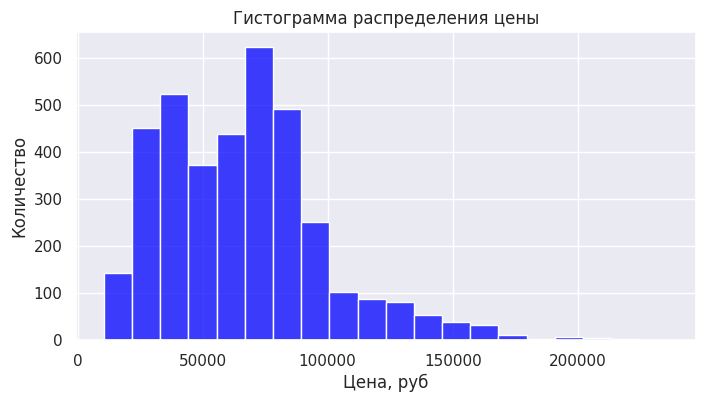

In [ ]:
sns.histplot(Цена, bins=20, color='blue')
plt.title('Гистограмма распределения цены')
plt.xlabel('Цена, руб')
plt.ylabel('Количество')
plt.show()

In [ ]:
max_value = Цена.max()
min_value = Цена.min()
mean_value = Цена.mean()
median_value = Цена.median()
print(f'Наибольшая цена, руб: {max_value}', f'Наименьшая цена, руб: {min_value}',
     f'Средняя цена, руб: {mean_value}', f'Медианное значение цены, руб: {median_value}', sep='\n')

Наибольшая цена, руб: 235900
Наименьшая цена, руб: 10541
Средняя цена, руб: 66352.93689320388
Медианное значение цены, руб: 65900.0


In [ ]:
# количество объектов, значения цены по которым превышает 90 процентиль
len(df_copy[Цена>percentile_90_value])

371

In [ ]:
# посмотрим на значение 99 процентиля
Цена.quantile(0.99)

161334.40999999995

In [ ]:
# количество объектов, значения цены по которым превышает 99 процентиль
len(df_copy[Цена>Цена.quantile(0.99)])

38

In [ ]:
# рассмотрим объекты, значения цены по которым превышает 99 процентиль
df_copy[Цена>Цена.quantile(0.99)].sort_values(by='Цена_руб', ascending=False)

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
3487,151574147,"Игровой компьютер i7 13700KF, RTX 4070 Ti 12GB...",235900,NaN,Intel Core i7,16,64.0,DDR 5,NaN,NaN,NVIDIA GeForce RTX 4070,Windows 10 Pro Trial
3470,151567319,"Игровой компьютер AMD Ryzen 9 7900X, RTX 3080,...",215900,NaN,AMD Ryzen 9,12,32.0,DDR 5,NaN,NaN,NVIDIA GeForce RTX 3080,Windows 10 Pro Trial
1038,114465983,Мощный игровой компьютер Зевс 2.0 V3,214954,Купили более 5 раз,Intel Core i9,16,64.0,DDR 4,2000.0,1000.0,NVIDIA GeForce RTX 3080,Windows 10 Pro
1037,114465982,Мощный игровой компьютер Зевс 2.0 V3,214954,Купили более 20 раз,Intel Core i9,16,64.0,DDR 4,2000.0,1000.0,NVIDIA GeForce RTX 3080,Windows 10 Pro
1035,114461366,Мощный игровой компьютер Зевс 2.0 V2,209955,Купили менее 5 раз,Intel Core i9,16,32.0,DDR 4,2000.0,1000.0,NVIDIA GeForce RTX 3080,Windows 10 Pro
1036,114461367,Мощный игровой компьютер Зевс 2.0 V2,209955,Купили менее 5 раз,Intel Core i9,16,32.0,DDR 4,2000.0,1000.0,NVIDIA GeForce RTX 3080,Windows 10 Pro
1954,143547537,Игровой компьютер Системный блок ПК CompDay Атом,203103,NaN,Intel Core i7,12,32.0,DDR 4,NaN,NaN,NVIDIA GeForce RTX 3080,Windows 10 Pro
1523,139123549,Игровой компьютер Ice Cube D7,202391,Купили более 5 раз,Intel Core i5,14,16.0,DDR 5,1000.0,1000.0,NVIDIA GeForce RTX 4080,Windows 11
2530,145377141,Игровой ПК I7-12700KF/32GB/M.2 1000GB/RTX 3080...,200000,NaN,Intel Core i7,12,32.0,DDR 4,NaN,NaN,NVIDIA GeForce RTX 3080,Windows 10 Pro
2529,145376034,Игровой ПК AMD Ryzen9 5900X/32GB/M.2 1000GB/RT...,200000,Купили менее 5 раз,AMD Ryzen 9,12,32.0,DDR 4,NaN,NaN,NVIDIA GeForce RTX 3080,Windows 10 Pro


In [ ]:
# исключим данные наблюдения из датасета
df_copy = df_copy[df_copy.Цена_руб<=Цена.quantile(0.99)]
df_copy.shape

(3670, 12)

In [ ]:
df_copy.Цена_руб.describe()

,Цена_руб
count,3670.0
mean,65131.044959
std,30332.117418
min,10541.0
25%,38990.0
50%,65630.0
75%,82987.0
max,161021.0


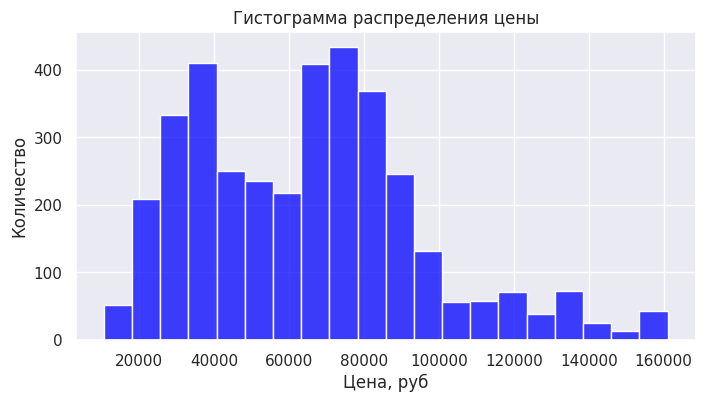

In [ ]:
sns.histplot(df_copy.Цена_руб, bins=20, color='blue')
plt.title('Гистограмма распределения цены')
plt.xlabel('Цена, руб')
plt.ylabel('Количество')
plt.show()

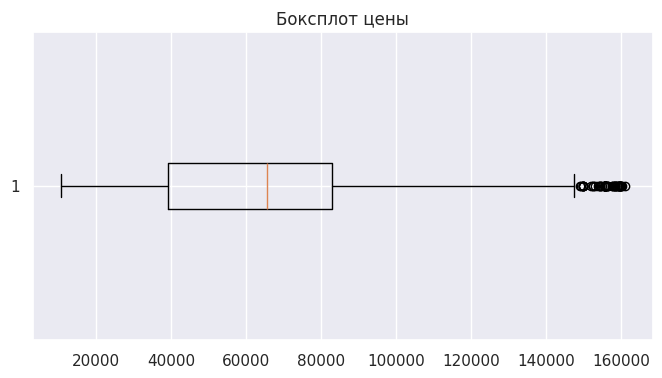

In [ ]:
plt.boxplot(df_copy.Цена_руб, vert=False)
plt.title('Боксплот цены')
plt.show()

In [ ]:
# коэффициенты ассиметрии и эксцесса
skew = df_copy.Цена_руб.skew()
kurtosis = df_copy.Цена_руб.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 0.6470185914350021
Коэффициент эксцесса: 0.25873384650911246


In [ ]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(df_copy.Цена_руб)

ShapiroResult(statistic=0.958881659194982, pvalue=4.8780536309712525e-31)

***Шпаргалка по выводам:***
1. О максимальных и минимальных значениях признака (оцените размах значений).
2. О нулевых значениях (их наличие, нужна ли предобработка).
3. О средних величинах (среднее, медиана, их отличия, возможные причины).
4. О процентилях (сколько процентов данных не превышают то или иное значение).
5. О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).
6. О нормальности распределения признака (учитывая проведенные тесты).

**Выводы:**
1. Минимальное значение цены по исходной выборке - 132 руб, максимальное - 235900 руб. Размах значений составил 235768 руб. В процессе анализа данных было выявлено наличие неадекватных значений - очень низкой ценой, анализ столбца Наименование показал, что товары с ценой меньше 10000 руб не являются комьютерными сборками. Было принято удалить такие значения. Поскольку цена 99% товаров не превышает 161334 руб, а количество значений за пределами 99 процентиля всего 38 шт., было принято решение об исключении этих объектов из последующего анализа. После корректировки минимальное и максимальное значение цены составило 10541 и 161021 руб, а размах составил 150480 руб.
2. После исключения неадекватных значений и выбросов среднее значение составило примерно 65131 руб, а медианное - 65630 руб. Значения практически равны. Небольшой сдвиг может быть причиной оставшихся аномальных значений товара.
3. Цена 25% товаров не превышает 38990 руб, а 75% товаров - 82987 руб.
4. На гистограмме видно, что распределение признака отлично от нормального. В то же время цена в диапазоне примерно от 40000 руб и до 65000 руб "проседает", несмотря на то, что средние значения составляют 65000 руб. Возможно, целесообразно разделить цену на 4 категории (например, 10000-40000, 40000-65000, 65000-95000, свыше 95000), которые в дальнейшем проанализировать отдельно. Боксплот показывает наличие длинного "хвоста" справа и оставшихся выбросов примерно после цены в 147000 руб, что также свидетельствует об отличии распределения признака от нормального.
5. Коэффициент ассиметрии больше 0, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса больше 0, что говорит о сосредоточенности значений около средних, т.е. острых вершинах и "средних хвостах". По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### Количество_ядер

In [ ]:
N_core = df_copy.Количество_ядер

In [ ]:
N_core.unique()

<IntegerArray>
[2, 0, 6, 10, 4, 12, 16, 8, 14, 20, 24]
Length: 11, dtype: Int64

In [ ]:
# на этапе очистки данных мы отсутствующие значения заменили на 0 (п.3.5), теперь нужно избавиться от этих зачений
df_copy = df_copy.loc[(df_copy['Количество_ядер'] != 0)]

In [ ]:
N_core = df_copy.Количество_ядер
N_core.unique()

<IntegerArray>
[2, 6, 10, 4, 12, 16, 8, 14, 20, 24]
Length: 10, dtype: Int64

In [ ]:
N_core.describe()

,Количество_ядер
count,3434.0
mean,6.577169
std,3.596453
min,2.0
25%,4.0
50%,6.0
75%,8.0
max,24.0


In [ ]:
percentile_10_value = N_core.quantile(0.10)
percentile_25_value = N_core.quantile(0.25)
percentile_50_value = N_core.quantile(0.50)
percentile_75_value = N_core.quantile(0.75)
percentile_90_value = N_core.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 4.0
25-й процентиль: 4.0
50-й процентиль: 6.0
75-й процентиль: 8.0
90-й процентиль: 12.0


In [ ]:
# количество объектов, данные о количестве ядер по которым превышает 90 процентиль
len(df_copy[df_copy.Количество_ядер>percentile_90_value])

109

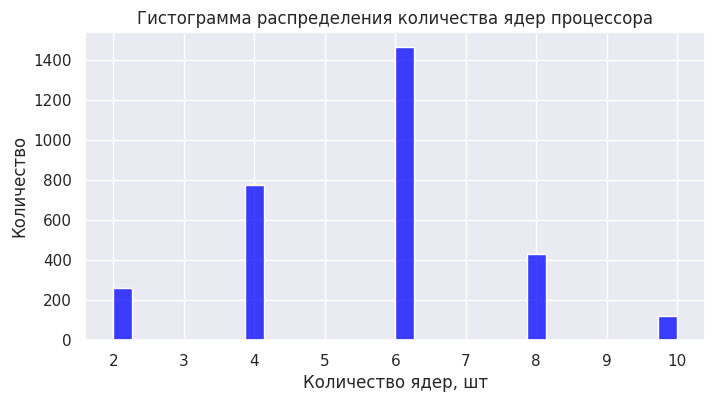

In [ ]:
# построим гистограмму, ограничив 90 процентилем для наглядности
sns.histplot(N_core[N_core<percentile_90_value], bins=30, color='blue')
plt.title('Гистограмма распределения количества ядер процессора')
plt.xlabel('Количество ядер, шт')
plt.ylabel('Количество')
plt.show()

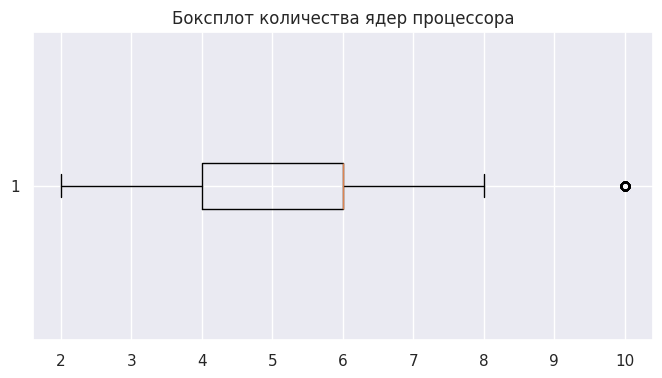

In [ ]:
# построим боксплот, ограничив 90 процентилем для наглядности
plt.boxplot(N_core[N_core<percentile_90_value], vert=False)
plt.title('Боксплот количества ядер процессора')
plt.show()

In [ ]:
# коэффициенты ассиметрии и эксцесса
skew = N_core.skew()
kurtosis = N_core.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 2.3724567855016745
Коэффициент эксцесса: 8.279679522676682


In [ ]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(N_core)

ShapiroResult(statistic=0.7545262434330497, pvalue=9.185192597718916e-58)

**Выводы:**
1. Минимальное число ядер процессора - 2 шт. (но есть отсутствующие значения), максимальное - 24 шт.
2. В выборке присутствуют незаполненные значения. Не заполнены значения по 808 объектам (примерно 24%: (3224-2416)/3224), возможно, по причине закрытых аккаунтов. Подписчики отсутствуют у 538 пользователей.
3. Cреднее число ядер процессора составляет 6,6 шт., а медианное - 6 шт. Значения практически равны.
4. Число ядер у 25% товаров не превышает 4 ядер, а 75% пользователей - 8 ядер, что свидетельствует о том, что у большинства товаров - 6 ядер.
5. На гистограмме видно, что распределение признака близко к нормальному, хотя и имеется ряд выбросов справа. Боксплот также показывает равенство "хвостов" и  выбросы после уровня в 8 ядер, а также медианы, расположенной ровно на отметке 6 ядер, что также свидетельствует об отличии распределения признака от нормального, но близком к нему.
6. Коэффициент ассиметрии больше 0, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса больше 0, что говорит о сосредоточенности значений вокруг среднего, т.е. острой вершине. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### Объем_ОЗУ_Гб

In [ ]:
V_ozu = df_copy.Объем_ОЗУ_Гб

In [ ]:
V_ozu.describe()

,Объем_ОЗУ_Гб
count,3427.000000
mean,18.560549
std,19.883339
min,1.000000
25%,16.000000
50%,16.000000
75%,16.000000
max,1000.000000


In [ ]:
percentile_10_value = V_ozu.quantile(0.10)
percentile_25_value = V_ozu.quantile(0.25)
percentile_50_value = V_ozu.quantile(0.50)
percentile_75_value = V_ozu.quantile(0.75)
percentile_90_value = V_ozu.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 8.0
25-й процентиль: 16.0
50-й процентиль: 16.0
75-й процентиль: 16.0
90-й процентиль: 32.0


In [ ]:
# количество объектов, значения затрат по которым превышает 90 процентиль
len(V_ozu[V_ozu>V_ozu.quantile(0.90)])

61

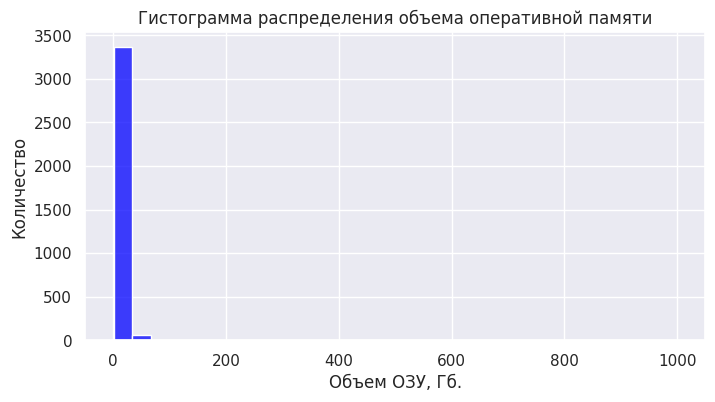

In [ ]:
sns.histplot(V_ozu, bins=30, color='blue')
plt.title('Гистограмма распределения объема оперативной памяти')
plt.xlabel('Объем ОЗУ, Гб.')
plt.ylabel('Количество')
plt.show()

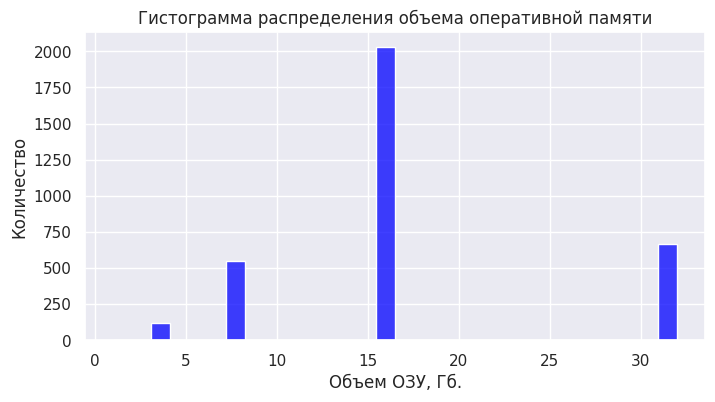

In [ ]:
# построим гистограмму, ограничив 99 процентилем для наглядности
sns.histplot(V_ozu[V_ozu<V_ozu.quantile(0.99)], bins=30, color='blue')
plt.title('Гистограмма распределения объема оперативной памяти')
plt.xlabel('Объем ОЗУ, Гб.')
plt.ylabel('Количество')
plt.show()

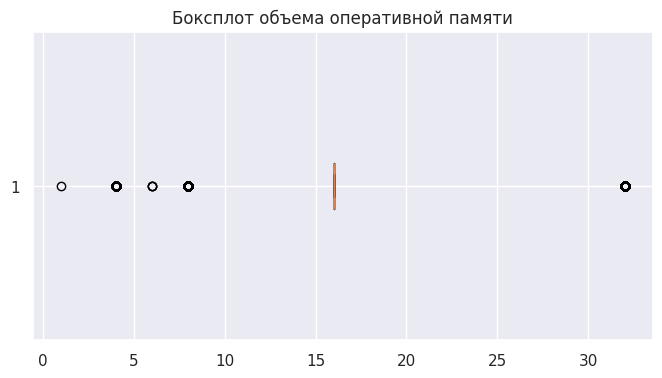

In [ ]:
# построим боксплот, ограничив 99 процентилем для наглядности
plt.boxplot(V_ozu[V_ozu<V_ozu.quantile(0.99)], vert=False)
plt.title('Боксплот объема оперативной памяти')
plt.show()

In [ ]:
# коэффициенты ассиметрии и эксцесса
skew = V_ozu.skew()
kurtosis = V_ozu.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 35.75110626220703
Коэффициент эксцесса: 1737.6370849609375


In [ ]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(V_ozu)

ShapiroResult(statistic=nan, pvalue=nan)

**Выводы:**
1. Минимальный объем оперативной памяти - 1 Гб., максимальный - 1000 Гб. Размах значений составил 1000 Гб.
2. Cредний объем оперативной памяти составляет примерно 18,5 Гб., а медианный - 16 Гб. Сдвиг незначительный, но свидетельствует о скошенности распределения вправо, наличия небольшого числа значений с большим объемом оперативной памяти.
3. Процентили с 25-го по 75-й равны и составляют 16 Гб. То есть половина товаров имеют объем оперативной памяти - 16 Гб.
4. На гистограмме видно, что распределение признака отлично от нормального: высокий столб по середине на уровне 16 Гб. и отдельные неравные столбики справа и слева. Боксплот ограниченность максимального количества наблюдений в районе 16 Гб. и многочисленные выбросы справа и слева, что свидетельствует об отличии распределения признака от нормального.
5. Коэффициент ассиметрии много больше 0, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса много больше 0, что говорит о большой сосредоточенности значений вокруг среднего, т.е. острой вершине. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### Объем_HDD_Гб

In [ ]:
V_hdd = df_copy.Объем_HDD_Гб.dropna()

In [ ]:
V_hdd.describe()

,Объем_HDD_Гб
count,1123.000000
mean,934.327698
std,282.580109
min,0.000000
25%,1000.000000
50%,1000.000000
75%,1000.000000
max,4000.000000


In [ ]:
percentile_10_value = V_hdd.quantile(0.10)
percentile_25_value = V_hdd.quantile(0.25)
percentile_50_value = V_hdd.quantile(0.50)
percentile_75_value = V_hdd.quantile(0.75)
percentile_90_value = V_hdd.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 500.0
25-й процентиль: 1000.0
50-й процентиль: 1000.0
75-й процентиль: 1000.0
90-й процентиль: 1000.0


In [ ]:
# количество объектов, по которым жесткий диск отсутствует
len(df_copy[df_copy.Объем_HDD_Гб==0])

44

In [ ]:
# количество объектов, значения объема жесткого диска по которым превышает 90 процентиль
len(df_copy[df_copy.Объем_HDD_Гб>percentile_90_value])

15

In [ ]:
# количество объектов, значения объема жесткого диска по которым превышает 90 процентиль
percentile_99_value = V_hdd.quantile(0.99)
len(df_copy[df_copy.Объем_HDD_Гб>percentile_99_value])

2

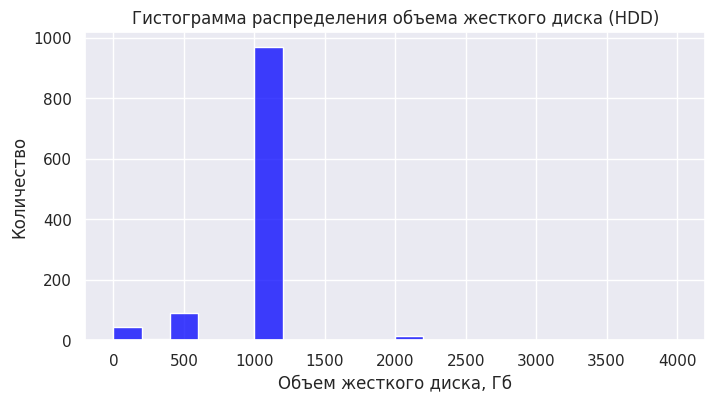

In [ ]:
# построим гистограмму
sns.histplot(V_hdd, bins=20, color='blue')
plt.title('Гистограмма распределения объема жесткого диска (HDD)')
plt.xlabel('Объем жесткого диска, Гб')
plt.ylabel('Количество')
plt.show()

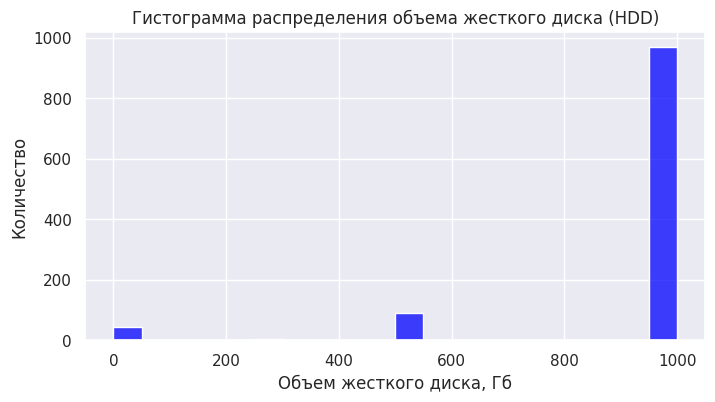

In [ ]:
# построим гистограмму, ограничив 99 процентилем для наглядности
sns.histplot(V_hdd[V_hdd<percentile_99_value], bins=20, color='blue')
plt.title('Гистограмма распределения объема жесткого диска (HDD)')
plt.xlabel('Объем жесткого диска, Гб')
plt.ylabel('Количество')
plt.show()

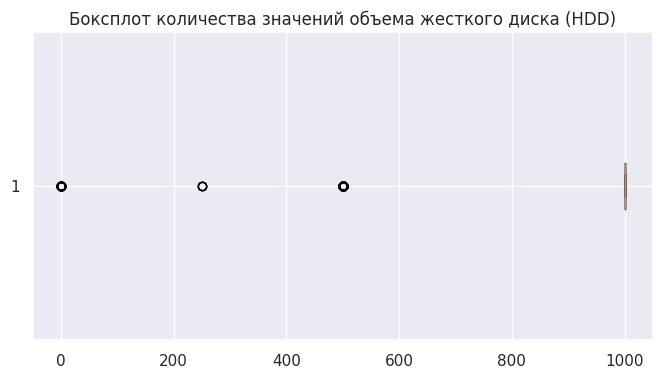

In [ ]:
# построим боксплот, ограничив 99 процентилем для наглядности
plt.boxplot(V_hdd[V_hdd<percentile_99_value], vert=False)
plt.title('Боксплот количества значений объема жесткого диска (HDD)')
plt.show()

In [ ]:
# коэффициенты ассиметрии и эксцесса
V_hdd = V_hdd[V_hdd<percentile_99_value]
skew = V_hdd.skew()
kurtosis = V_hdd.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: -2.8725836277008057
Коэффициент эксцесса: 7.376333713531494


In [ ]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(V_hdd)

ShapiroResult(statistic=0.39168604287035935, pvalue=2.4156463772690755e-51)

Выводы:

Минимальный объема жесткого диска (HDD) - 0 (отсутствие), максимальное - 4000 Гб (4 Тб).
В выборке присутствуют незаполненные и нулевые значения. Жесткий диск отсутствуют у 44 товаров.
Cреднее значение объема жесткого диска составляет примерно 934 Гб., а медианное - 1000 Гб. Значения идентичны.
Объем жесткого диска у 25%, 50% и 75% товаров одинаков 1000 Гб., что свидетельствует о том, что у подавляющего числа товаров - объем жесткого диска равен 1000 Гб.
На гистограмме видно, что распределение признака отлично от нормального: высокий столб справа и незначительные выбросы слева. Боксплот показывает отсутствие "хвостов" и наличие выбросов слева, что также свидетельствует об отличии распределения признака от нормального.
Коэффициент ассиметрии меньше 0, что так же свидетельствует о скошенности влево. Коэффициент эксцесса больше 0, что говорит о большой сосредоточенности значений вокруг среднего, т.е. острой вершине. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### Объем_SSD_Гб

In [ ]:
V_ssd = df_copy.Объем_SSD_Гб.dropna()

In [ ]:
V_ssd.describe()

,Объем_SSD_Гб
count,1123.000000
mean,425.939453
std,176.384094
min,120.000000
25%,250.000000
50%,500.000000
75%,500.000000
max,2000.000000


In [ ]:
percentile_10_value = V_ssd.quantile(0.10)
percentile_25_value = V_ssd.quantile(0.25)
percentile_50_value = V_ssd.quantile(0.50)
percentile_75_value = V_ssd.quantile(0.75)
percentile_90_value = V_ssd.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 250.0
25-й процентиль: 250.0
50-й процентиль: 500.0
75-й процентиль: 500.0
90-й процентиль: 500.0


In [ ]:
# количество объектов, по которым SSD диск отсутствует
len(df_copy[df_copy.Объем_SSD_Гб==0])

0

In [ ]:
# количество объектов, значения объема SSD диска по которым превышает 90 процентиль
len(df_copy[df_copy.Объем_SSD_Гб>percentile_90_value])

25

In [ ]:
# количество объектов, значения объема SSD диска по которым превышает 90 процентиль
percentile_99_value = V_ssd.quantile(0.99)
len(df_copy[df_copy.Объем_SSD_Гб>percentile_99_value])

3

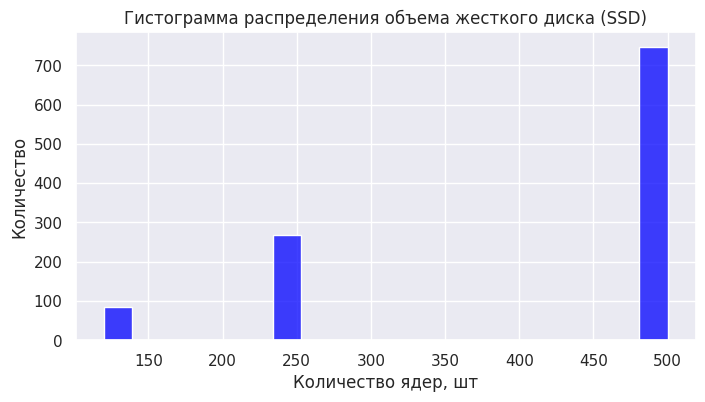

In [ ]:
# построим гистограмму, ограничив 99 процентилем для наглядности
sns.histplot(V_ssd[V_ssd<percentile_99_value], bins=20, color='blue')
plt.title('Гистограмма распределения объема жесткого диска (SSD)')
plt.xlabel('Количество ядер, шт')
plt.ylabel('Количество')
plt.show()

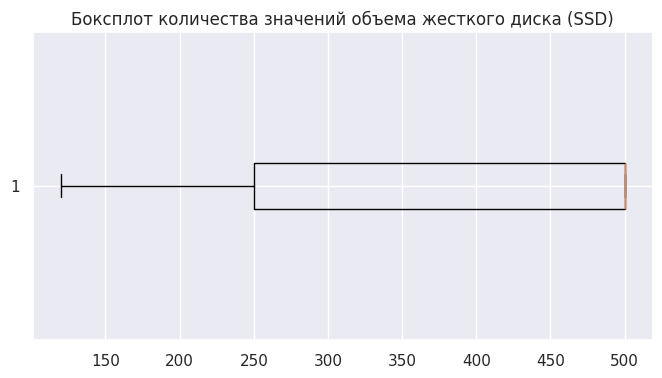

In [ ]:
# построим боксплот, ограничив 99 процентилем для наглядности
plt.boxplot(V_ssd[V_ssd<percentile_99_value], vert=False)
plt.title('Боксплот количества значений объема жесткого диска (SSD)')
plt.show()

In [ ]:
# коэффициенты ассиметрии и эксцесса
V_ssd = V_ssd[V_ssd<percentile_99_value]
skew = V_ssd.skew()
kurtosis = V_ssd.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: -0.9703603982925415
Коэффициент эксцесса: -0.7370563745498657


In [ ]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(V_ssd)

ShapiroResult(statistic=0.6424200312501489, pvalue=6.598861150233971e-43)

Выводы:

Минимальный объем жесткого диска (SSD) - 120 Гб, максимальный - 500 Гб. Cреднее значение объема жесткого диска составляет примерно 426 Гб, а медианное - 500 Гб. Значения идентичны. Объем жесткого диска у 25% товаров не превышает - 250 Гб, а 50%, 75% и 90% товаров одинаков 500 Гб., что свидетельствует о том, что у подавляющего числа товаров - объем жесткого диска равен 500 Гб.
На гистограмме видно, что распределение признака отлично от нормального: высокий столб справа и незначительные выбросы слева. Боксплот показывает только "хвост" слева и отсутствие выбросов, что также свидетельствует об отличии распределения признака от нормального.
Коэффициент ассиметрии меньше 0, что так же свидетельствует о скошенности влево. Коэффициент эксцесса меньше 0, что может говорить о большой сосредоточенности значений вокруг среднего, т.е. острой вершине, при полном отсутствии отличных значений справа. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

## 4.2. Категориальные признаки

In [ ]:
df_copy.select_dtypes(include=[object]).columns

Index(['Наименование', 'Количество_продаж', 'Тип_процессора', 'Тип_ОЗУ',
       'Видеопроцессор', 'Операционная система'],
      dtype='object')

### Наименование

In [ ]:
Имя = df_copy.Наименование
Имя.describe()

,Наименование
count,3434
unique,1574
top,"Компьютер RGB, Системный Блок, ПК Intel i7"
freq,33


In [ ]:
Имя.mode()

,Наименование
0,"Компьютер RGB, Системный Блок, ПК Intel i3"
1,"Компьютер RGB, Системный Блок, ПК Intel i5"
2,"Компьютер RGB, Системный Блок, ПК Intel i7"
3,"Компьютер, Системный Блок, ПК Intel i3"
4,"Компьютер, Системный Блок, ПК Intel i5"
5,"Компьютер, Системный Блок, ПК Intel i7"


In [ ]:
a = Имя.value_counts()
a

,count
Наименование,
"Компьютер RGB, Системный Блок, ПК Intel i7",33
"Компьютер RGB, Системный Блок, ПК Intel i5",33
"Компьютер RGB, Системный Блок, ПК Intel i3",33
"Компьютер, Системный Блок, ПК Intel i7",33
"Компьютер, Системный Блок, ПК Intel i3",33
...,...
Компьютер Roo24 AMD Starting V1,1
Игровой Компьютер Robotcomp Аллигатор 2.0 Bluetooth V3,1
Игровой Компьютер Robotcomp Аллигатор 2.0 Bluetooth V1,1


In [ ]:
a.head(16)

,count
Наименование,
"Компьютер RGB, Системный Блок, ПК Intel i7",33
"Компьютер RGB, Системный Блок, ПК Intel i5",33
"Компьютер RGB, Системный Блок, ПК Intel i3",33
"Компьютер, Системный Блок, ПК Intel i7",33
"Компьютер, Системный Блок, ПК Intel i3",33
"Компьютер, Системный Блок, ПК Intel i5",33
Игровой компьютер Roo24 Gaming S4 Plus,30
"Игровой Компьютер 24 Ядра GTX1060 INTEL ПК, Системный Блок",24
Игровой компьютер Roo24 i7-12700F/3070 8Gb,12


In [ ]:
# для наглядного отображения долей товаров по наименованию можно оставить первые 16 товаров по отдельности, а остальные объединить.
#plt.pie(Имя.value_counts(), labels = Имя.value_counts().index, autopct='%.1f')
#plt.title('Распределение товаров по наименованию')
#plt.show()

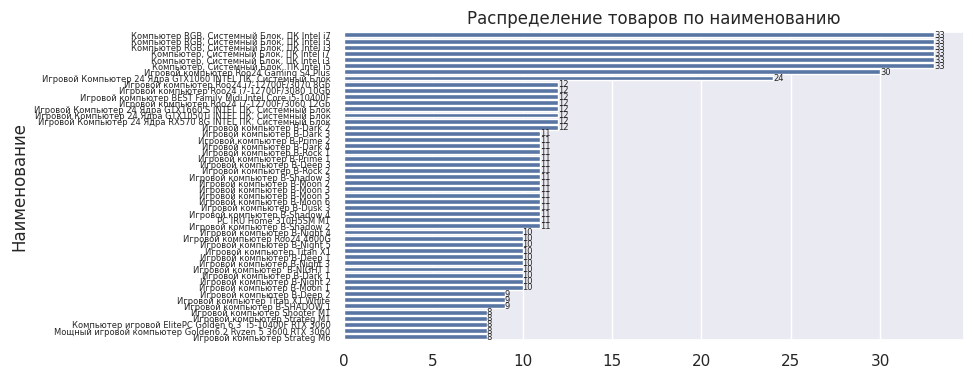

In [ ]:
# круговая диаграмма будет слишком нагромождена, лучше использовать столбчатую диаграмму (в строчном виде) первых 50 товаров
ax = sns.barplot(y=Имя.value_counts().index[:50], x=Имя.value_counts().values[:50])
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Распределение товаров по наименованию')
plt.yticks(fontsize = 6)
plt.show()

In [ ]:
# из-за нагромождения наименований и их кучности, оставим первые 45 товаров (количество 9 и более), а остальные объединить в "прочие"
other_types = a[a<9]
a = a[a>=9]
a['Прочие'] = other_types.sum()

In [ ]:
# подсчитаем количество наблюдений в новом столбце "Прочие"
a['Прочие']

2783

In [ ]:
# строить такой график бессмысленно, т.к. столбец "Прочие" намного больше количества первых 45 наиболее встречаемых наименований,
# причина в кучности наблюдений и незначительности отличия друг от друга их значений

***Шпаргалка по выводам:***
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

**Выводы:**
1. В датасете по признаку Наименование ('title') - 1574 уникальных наименований.
2. Наиболее частовстречаемые наименования у 8 товаров (от 24 до 33 шт.):
- Компьютер RGB, Системный Блок, ПК Intel i7	33шт
- Компьютер RGB, Системный Блок, ПК Intel i5	33шт
- Компьютер RGB, Системный Блок, ПК Intel i3	33шт
- Компьютер, Системный Блок, ПК Intel i7	33шт
- Компьютер, Системный Блок, ПК Intel i3	33шт
- Компьютер, Системный Блок, ПК Intel i5	33шт
- Игровой компьютер Roo24 Gaming S4 Plus	30шт
- Игровой Компьютер 24 Ядра GTX1060 INTEL ПК, Системный Блок	24шт
Далее следует плотная группа, где каждое наименоватие встречается не чаще 12 раз.
3. Из-за большой плотности значений построение диаграм, а тем более круговых диаграмм бессмысленно.

### Количество_продаж

In [ ]:
N_sales = df_copy.Количество_продаж
N_sales.describe()

,Количество_продаж
count,797
unique,17
top,Купили менее 5 раз
freq,441


In [ ]:
N_sales.mode()

,Количество_продаж
0,Купили менее 5 раз


In [ ]:
N_sales.value_counts()

,count
Количество_продаж,
Купили менее 5 раз,441
Купили более 5 раз,137
Купили более 10 раз,93
Купили более 20 раз,40
Купили более 40 раз,16
Купили более 30 раз,16
Купили более 100 раз,16
Купили более 50 раз,9
Купили более 80 раз,7


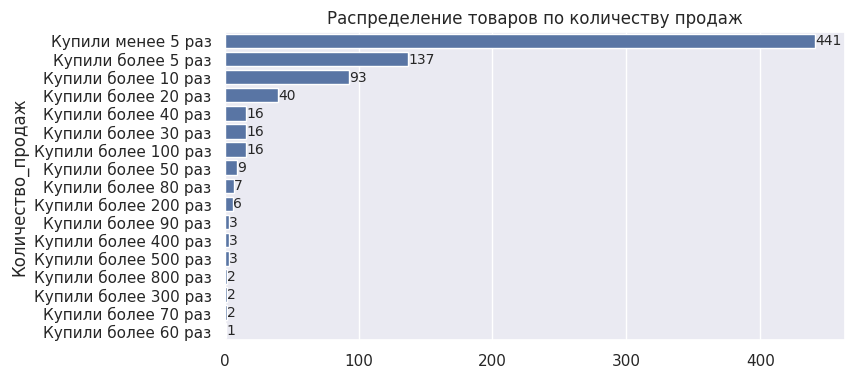

In [ ]:
ax = sns.barplot(y=N_sales.value_counts().index[:17], x=N_sales.value_counts().values[:17])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по количеству продаж')
plt.show()

In [ ]:
# Оценим самые продаваемые товары (с количеством продаж более 800 раз)
a = df_copy.loc[df_copy['Количество_продаж'] == 'Купили более 800 раз']
a

,Идентификатор,Наименование,Цена_руб,Количество_продаж,Тип_процессора,Количество_ядер,Объем_ОЗУ_Гб,Тип_ОЗУ,Объем_HDD_Гб,Объем_SSD_Гб,Видеопроцессор,Операционная система
94,43240828,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,Купили более 800 раз,Intel Pentium,2,4.0,DDR 4,NaN,NaN,Intel HD Graphics 610,отсутствует
1610,142153356,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,32900,Купили более 800 раз,Intel Core i7,4,16.0,DDR 3,0.0,500.0,NVIDIA GeForce GT 730,Windows


**Выводы:**
1. Количество уникальных значений по количеству продаж составляет 17.
2. Большая половина значений (примерно 55%) попадает в категорию 'количество продаж менее 5 раз', встретилось 441 раз в выборке.
3. На втором месте - 'количество продаж от 5 до 10 раз' (137 раз). На третьеи месте - 'количество продаж от 10 до 20 раз' (93 раза). На остальные категории (купили более 20 раз) приходится менее 16% от всех значений.
4. Самыми "продаваемыми" компьютерными сборками (более 800 раз) стали 2 сборки:
* Компьютер Raskat (Intel Pentium G6400/4Gb/120G...	с ценой 36990 руб и компоновкой: ЦПУ-Intel Pentium G6400 2 ядра / ОЗУ-4Gb DDR4 / HDD-NaN / SSD-120Gb / Видео-Intel HD Graphics 610 / ОС - без операционной системы)
* Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...	(с ценой 32900 руб и компоновкой: ЦПУ-Intel Core i7 4 ядра / ОЗУ-16Gb DDR3 / HDD-без HDD / SSD-512Gb / Видео-NVIDIA GeForce GT 730 / ОС - Windows)

### Тип_процессора

In [ ]:
typeCPU = df_copy.Тип_процессора

In [ ]:
typeCPU.describe()

,Тип_процессора
count,3434
unique,50
top,Intel Core i5
freq,1141


In [ ]:
typeCPU.mode()

,Тип_процессора
0,Intel Core i5


In [ ]:
typeCPU.value_counts()

,count
Тип_процессора,
Intel Core i5,1141
Intel Core i7,682
Intel Core i3,505
AMD Ryzen 5,494
AMD Athlon,121
не заполнено,90
Intel Xeon,77
AMD Ryzen 7,69
AMD Ryzen 3,51


In [ ]:
typeCPU.value_counts()[:5]

,count
Тип_процессора,
Intel Core i5,1141
Intel Core i7,682
Intel Core i3,505
AMD Ryzen 5,494
AMD Athlon,121


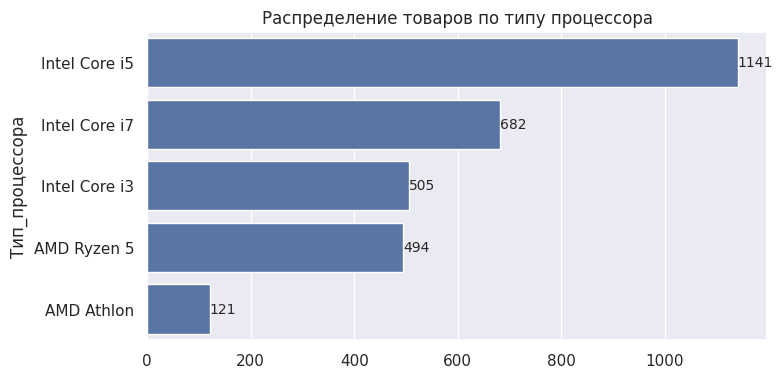

In [ ]:
ax = sns.barplot(y=typeCPU.value_counts().index[:5], x=typeCPU.value_counts().values[:5])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по типу процессора')
plt.show()

In [ ]:
# При таком распределении значений можно использовать круговую диаграмму, а менее встречаемые значения объединить в категорию "Прочие"
a = typeCPU.value_counts()

other_types = a[a<490]
a = a[a>=490]
a['Прочие'] = other_types.sum()

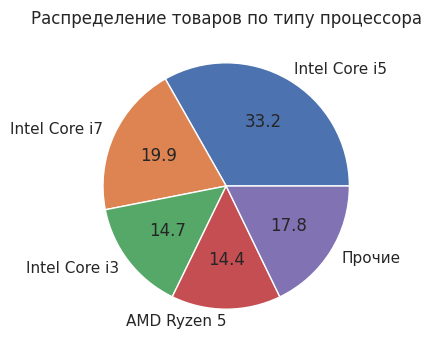

In [ ]:
plt.pie(a, labels = a.index, autopct='%.1f')
plt.title('Распределение товаров по типу процессора')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку "Тип процессора" составляет 50.
2. 33,2% товаров включают тип процессора Intel Core i5.
3. В топ-5 также входят
 - Intel Core i7,
 - Intel Core i3,
 - AMD Ryzen 5,
 - AMD Athlon.

### Тип_ОЗУ

In [ ]:
typeOZU = df_copy.Тип_ОЗУ
typeOZU.describe()

,Тип_ОЗУ
count,3427
unique,9
top,DDR 4
freq,3013


In [ ]:
typeOZU.mode()

,Тип_ОЗУ
0,DDR 4


In [ ]:
typeOZU.value_counts()

,count
Тип_ОЗУ,
DDR 4,3013
DDR 3,307
не заполнено,91
DDR 5,9
4Gb,2
16,2
16 Гб,1
4GB,1
RAM 16 ГБ,1


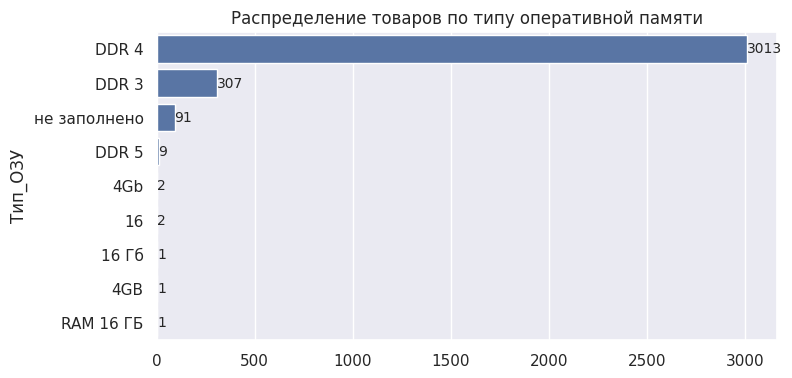

In [ ]:
ax = sns.barplot(y=typeOZU.value_counts().index, x=typeOZU.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по типу оперативной памяти')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку "Тип оперативной памяти" составляет 9.
2. Наиболее популярным типом является DDR 4, он использован почти в 88 % сборок.
3. На втором месте по популярности DDR 3 (почти 9 %). Остальные значения нет смысла рассматривать.

### Видеопроцессор

In [ ]:
video = df_copy.Видеопроцессор

In [ ]:
video.describe()

,Видеопроцессор
count,3434
unique,76
top,NVIDIA GeForce RTX 3060
freq,604


In [ ]:
video.mode()

,Видеопроцессор
0,NVIDIA GeForce RTX 3060


In [ ]:
video.value_counts()

,count
Видеопроцессор,
NVIDIA GeForce RTX 3060,604
NVIDIA GeForce RTX 3050,457
NVIDIA GeForce GTX 1650,326
NVIDIA GeForce GTX 1660,275
AMD Radeon Vega 7,212
...,...
Intel HD Graphics 600,1
RTX 1650 4GB,1
rx580,1


In [ ]:
video.value_counts()[:15]

,count
Видеопроцессор,
NVIDIA GeForce RTX 3060,604
NVIDIA GeForce RTX 3050,457
NVIDIA GeForce GTX 1650,326
NVIDIA GeForce GTX 1660,275
AMD Radeon Vega 7,212
Intel HD Graphics 2000,211
NVIDIA GeForce RTX 3070,197
NVIDIA GeForce GT 1030,185
NVIDIA GeForce RTX 2060,115


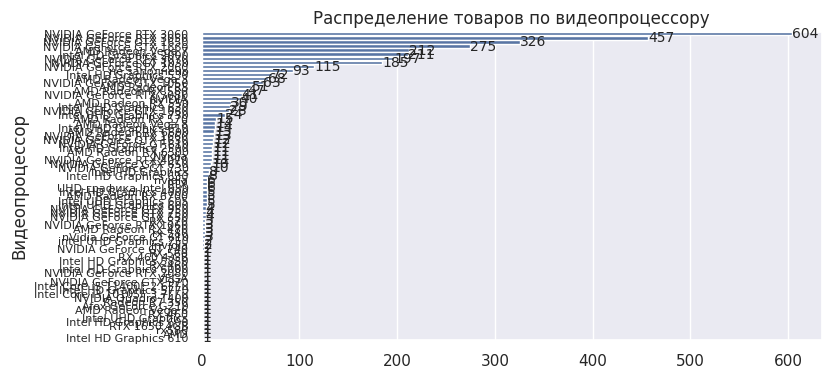

In [ ]:
# При таком распределении значений можно оставить 10 наиболее встречаемых значений, а остальные объединить в категорию "Прочие"
ax = sns.barplot(y=video.value_counts().index, x=video.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по видеопроцессору')
plt.yticks(fontsize = 8)
plt.show()

In [ ]:
a = video.value_counts()

other_types = a[a<90]
a = a[a>=90]
a['Прочие'] = other_types.sum()

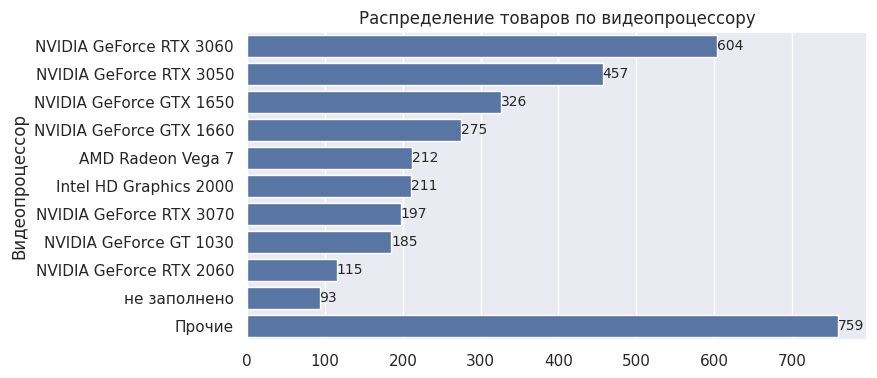

In [ ]:
ax = sns.barplot(y=a.index, x=a.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по видеопроцессору')
plt.show()

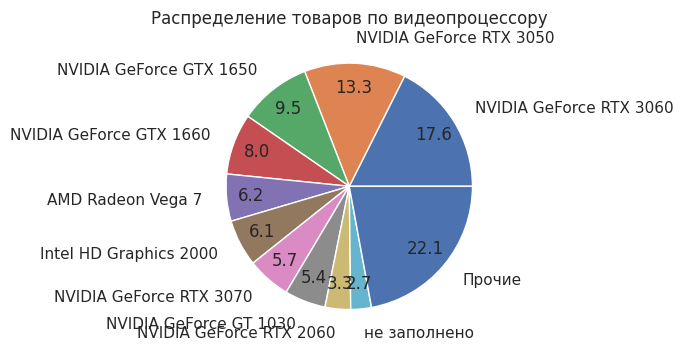

In [ ]:
# При таком распределении значений можно использовать круговую диаграмму
plt.pie(a, pctdistance=0.8, labeldistance=1.2, rotatelabels=0, labels = a.index, autopct='%.1f')
plt.title('Распределение товаров по видеопроцессору')

plt.show()

**Выводы:**
1. Количество уникальных значений по комплектующему "Видеопроцессор" составляет 76.
2. Наиболее встречаемое значение (примерно 18%) попадает в категорию 'NVIDIA GeForce RTX 3060', встретилось 604 раз в выборке.
3. - На втором месте - 'NVIDIA GeForce RTX 3050' 13% (457 раз).
   - На третьем месте - 'NVIDIA GeForce GTX 1650' 10% (326 раза).
   - На четверном месте - 'NVIDIA GeForce GTX 1660' 8% (275 раза).
   - Остальные модели занимают менее 6% каждая.
4. Из графиков видно о плотности значений. Можно выделить 4 лидеров, далее значения идут с меньшим отдичием между собой плотной группой.

### Операционная система

In [ ]:
os = df_copy['Операционная система']

In [ ]:
os.describe()

,Операционная система
count,3434
unique,32
top,Windows 10 Pro
freq,1704


In [ ]:
os.mode()

,Операционная система
0,Windows 10 Pro


In [ ]:
os.value_counts()

,count
Операционная система,
Windows 10 Pro,1704
Windows 11 Pro,663
Windows 10,379
windows пробная,219
отсутствует,149
Windows 10 Pro Trial,73
Windows 10 Home,46
Free DOS,42
Windows,37


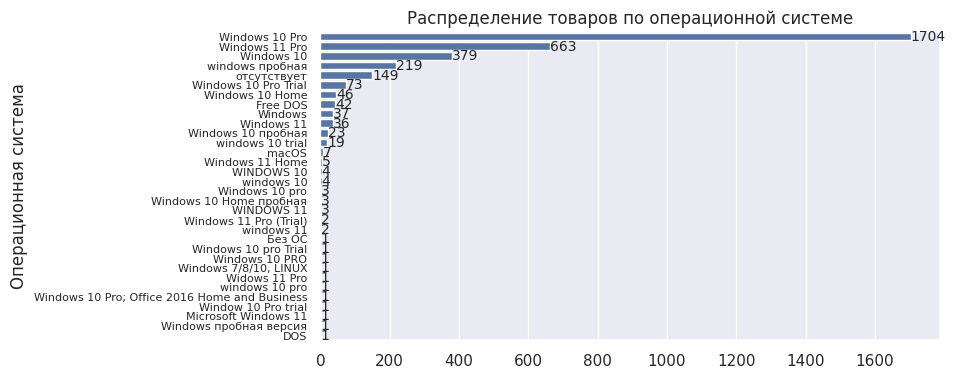

In [ ]:
ax = sns.barplot(y=os.value_counts().index, x=os.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по операционной системе')
plt.yticks(fontsize = 8)
plt.show()

In [ ]:
# При таком распределении значений можно оставить 5 наиболее встречаемых значений, а остальные объединить в категорию "Прочие"
a = os.value_counts()

other_types = a[a<140]
a = a[a>=140]
a['Прочие'] = other_types.sum()

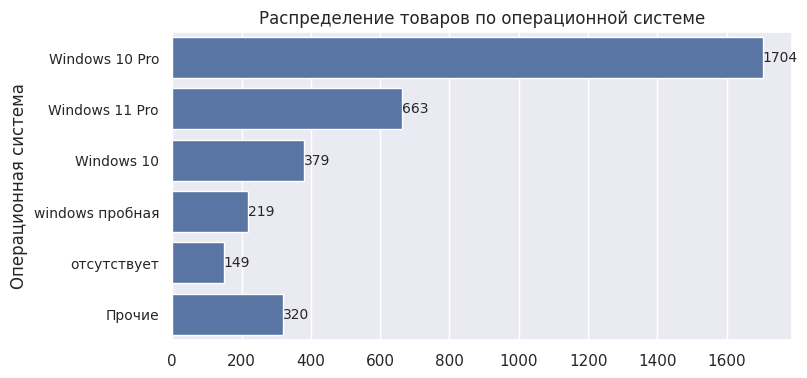

In [ ]:
ax = sns.barplot(y=a.index, x=a.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение товаров по операционной системе')
plt.yticks(fontsize = 10)
plt.show()

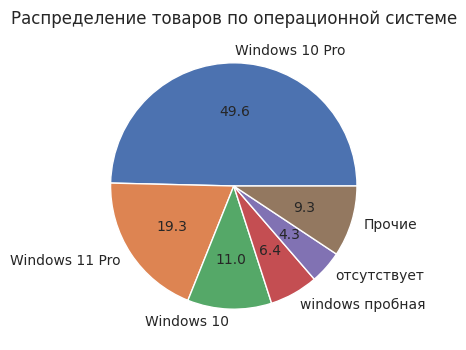

In [ ]:
# При таком распределении значений можно использовать круговую диаграмму
plt.pie(a, labels = a.index, autopct='%.1f', textprops = {"fontsize":10})
plt.title('Распределение товаров по операционной системе')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку "операционная система" составляет 32 единицы.
2. Почти половина сборок (примерно 50%) оснащается операционной системой 'Windows 10 Pro', встретилось 1704 раз в выборке.
3.
- На втором месте - 'Windows 11 Pro' 19% (663 раза).
- На третьем месте - 'Windows 10' 11% (379 раза).
- На четвертом месте - 'windows пробная' 6% (219 раза).
- На пятом месте - 'операционная система отсутствует' 4% (149 раза).
- На остальные виды операционных систем (суммарно) приходится около 9% от всех значений.
4. Однозначным лидером с большим отрывом является 'Windows 10 Pro', однако 'Windows 11 Pro' явно более современная версия операционной системы и пока только набирает объем, поэтому её не стоит сбрасывать со счетов.

Промежуточное сохранение результатов

In [ ]:
# целесообразно пересохранить датасеты в разрезе уникальных пользователей и в разрезе игр,
# поскольку были проведены корректировки и некоторые объекты были исключены из анализа
# df_copy.reset_index(drop=True, inplace=True)

print(df_copy.shape)
df_copy.to_excel('wb_pc_hard_clean_2.xlsx', index=False)
df_copy.to_csv('wb_pc_hard_clean_2.csv', index=False)

(3434, 12)


## 4.3. Взаимосвязь количественных признаков

In [ ]:
# при необходимости подгрузить файлы и сохранить данные в переменные
# df_copy = pd.read_excel('wb_pc_hard_clean_2.xlsx')
df_copy = pd.read_csv('wb_pc_hard_clean_2.csv')

In [ ]:
df_copy.select_dtypes(exclude=[object, 'datetime']).columns

Index(['Идентификатор', 'Цена_руб', 'Количество_ядер', 'Объем_ОЗУ_Гб',
       'Объем_HDD_Гб', 'Объем_SSD_Гб'],
      dtype='object')

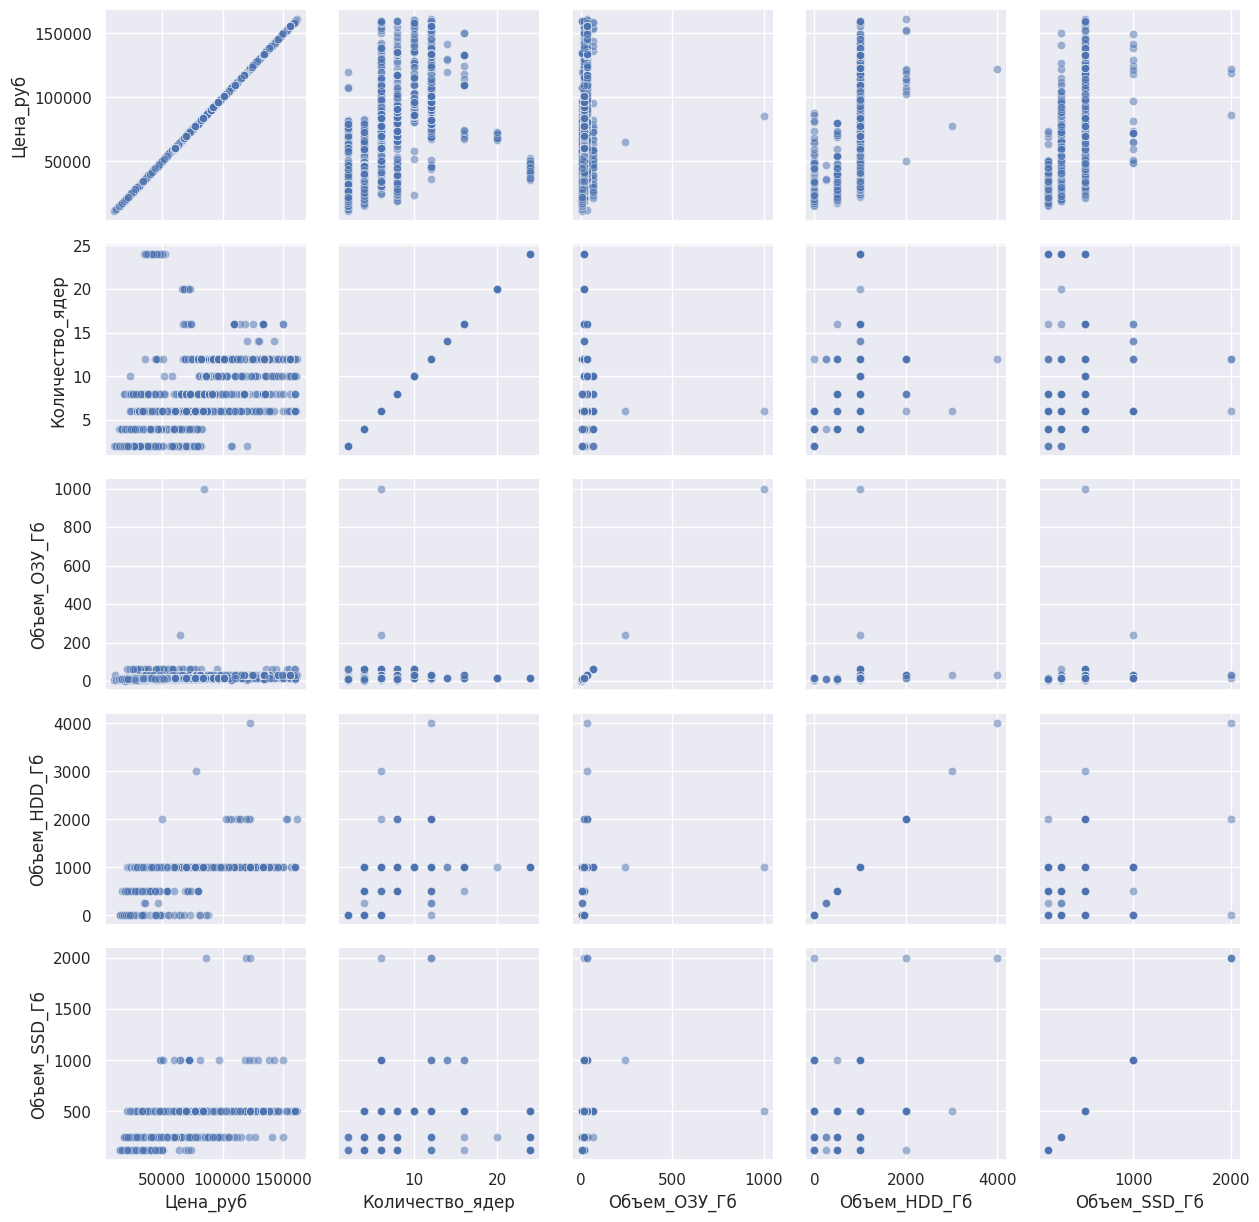

In [ ]:
g = sns.PairGrid(df_copy[['Цена_руб', 'Количество_ядер', 'Объем_ОЗУ_Гб', 'Объем_HDD_Гб', 'Объем_SSD_Гб']])
g.map(sns.scatterplot, alpha=0.5)
plt.show()

### Цена_руб - Количество_ядер

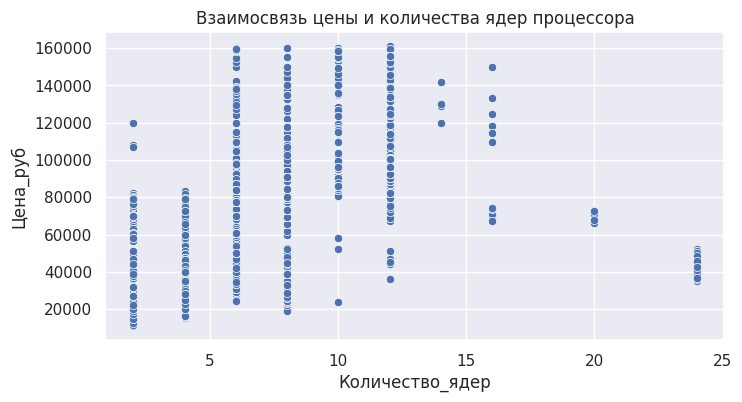

In [ ]:
# для наглядности построим зависимость цены от количества ядер процессора отдельно
sns.scatterplot(data=df_copy, x='Количество_ядер', y='Цена_руб')
plt.title('Взаимосвязь цены и количества ядер процессора')
plt.show()

In [ ]:
df_copy[['Цена_руб', 'Количество_ядер']].corr(method = 'spearman')

,Цена_руб,Количество_ядер
Цена_руб,1.000000,0.621702
Количество_ядер,0.621702,1.000000


### Цена_руб - Объем_ОЗУ_Гб

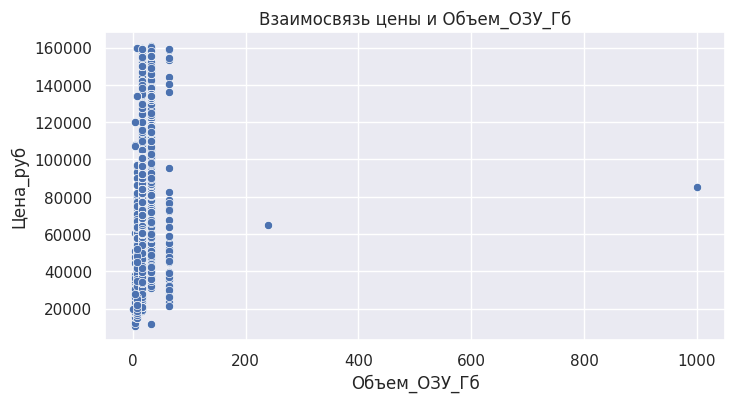

In [ ]:
# также для наглядности построим зависимость цены от количества ядер процессора отдельно
sns.scatterplot(data=df_copy, x='Объем_ОЗУ_Гб', y='Цена_руб')
plt.title('Взаимосвязь цены и Объем_ОЗУ_Гб')
plt.show()

In [ ]:
# так как график ненаглядный из-за выбросов, перестроим его откинув данные после 99го процентиля
new_dataset = df_copy
num_cols = ['Цена_руб', 'Количество_ядер', 'Объем_ОЗУ_Гб', 'Объем_HDD_Гб', 'Объем_SSD_Гб']
for col in num_cols:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

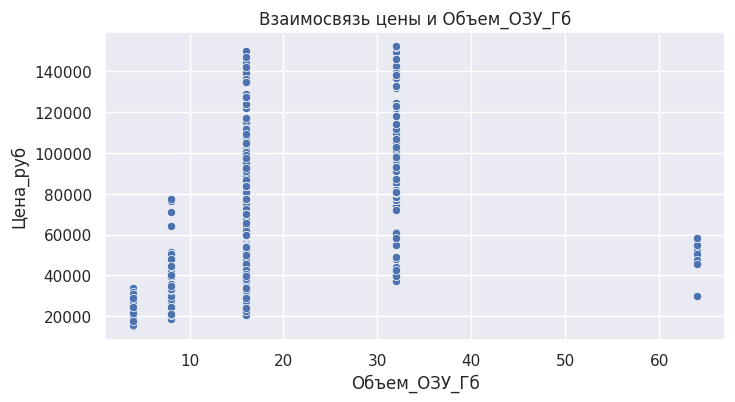

In [ ]:
sns.scatterplot(data=new_dataset, x='Объем_ОЗУ_Гб', y='Цена_руб')
plt.title('Взаимосвязь цены и Объем_ОЗУ_Гб')
plt.show()

In [ ]:
# теперь график более наглядный, с ростом объема растет и цена
df_copy[['Цена_руб', 'Объем_ОЗУ_Гб']].corr(method = 'spearman')

,Цена_руб,Объем_ОЗУ_Гб
Цена_руб,1.000000,0.528786
Объем_ОЗУ_Гб,0.528786,1.000000


### Цена_руб - /числовые комплектующие/ обобщенная зависимость

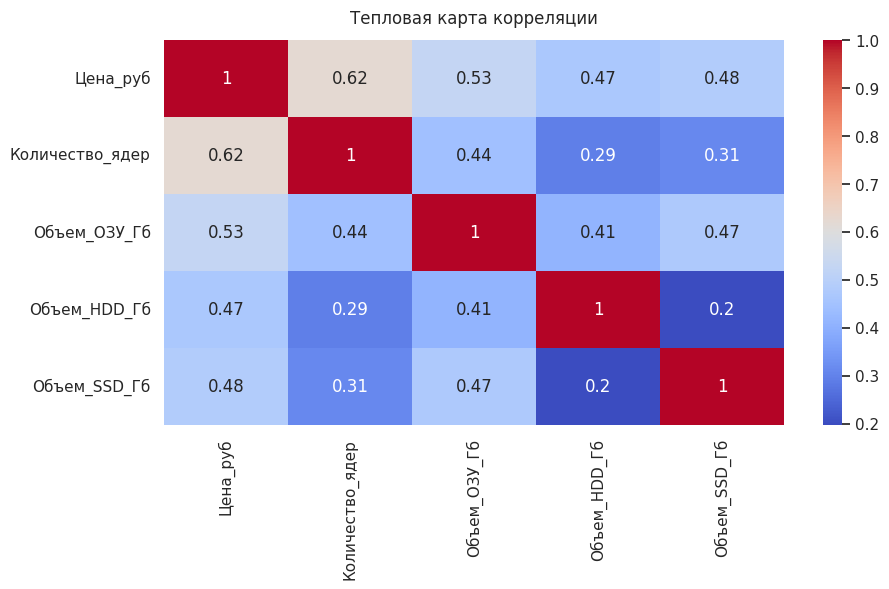

In [ ]:
# построим тепловую карту, чтобы оценить зависимость цены от комплектующих
num_cols=['Цена_руб','Количество_ядер', 'Объем_ОЗУ_Гб', 'Объем_HDD_Гб', 'Объем_SSD_Гб']
fig, ax = plt.subplots(figsize=(10, 5))
hm = sns.heatmap(df_copy[num_cols].corr(method = 'spearman'),annot=True, cmap= 'coolwarm')
hm.set_title('Тепловая карта корреляции', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_copy['Цена_руб'], df_copy['Количество_ядер'])

SignificanceResult(statistic=0.6217015695532824, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(df_copy['Цена_руб'], df_copy['Объем_ОЗУ_Гб'])

SignificanceResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.spearmanr(df_copy['Цена_руб'], df_copy['Объем_HDD_Гб'])

SignificanceResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.spearmanr(df_copy['Цена_руб'], df_copy['Объем_SSD_Гб'])

SignificanceResult(statistic=nan, pvalue=nan)

In [ ]:
# p-value меньше уровня значимости 0,05.
# Принимаем H1 о том,что связь между признаками статистически значима.

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).
2. О степени (по шкале Чеддока) и значимости взаимосвязи.

**Выводы:**
1. По общей диаграмме рассеяния заметно, что цена компьютерной сборки зависима от комплектующих. Зависимость линейная, с ростом значения комплектующего растет и цена сборки. Линейная связь между ценой сборки и комплектующими также подтверждается значением коэффициента кореляции Спирмена, а также результатами теста Спирмена на взаимосвязь признаков (p-value меньше уровня значимости 0,05).
2. Степень значимости взаимосвязи (по шкале Чеддока):
- с Количество ядер - 0,62 - средняя связь
- с Объем оперативной памяти - 0,53 - средняя связь
- с Объем HDD - 0,47 - слабая связь
- с Объем SSD - 0,48 - слабая связь

Шкала Чеддока:
от 0 до 0,3 — очень слабая;
от 0,3 до 0,5 — слабая;
от 0,5 до 0,7 — средняя;
от 0,7 до 0,9 — высокая;
от 0,9 до 1 — очень высокая.

## 4.4. Взаимосвязь количественных и категориальных признаков

### Количество_продаж - Количество ядер

In [ ]:
df_copy.groupby('Количество_продаж')['Количество_ядер'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество_продаж,,,,,,,,
Купили более 10 раз,93.0,5.225806,2.207345,2.0,4.0,6.0,6.0,12.0
Купили более 100 раз,16.0,5.625000,2.217356,2.0,5.5,6.0,6.0,12.0
Купили более 20 раз,40.0,5.700000,2.623366,2.0,4.0,6.0,6.0,16.0
Купили более 200 раз,6.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
Купили более 30 раз,16.0,5.000000,2.921187,2.0,2.0,5.0,6.0,12.0
Купили более 300 раз,2.0,3.000000,1.414214,2.0,2.5,3.0,3.5,4.0
Купили более 40 раз,16.0,5.375000,2.276694,2.0,4.0,6.0,6.0,12.0
Купили более 400 раз,3.0,3.333333,2.309401,2.0,2.0,2.0,4.0,6.0
Купили более 5 раз,137.0,6.029197,2.807400,2.0,4.0,6.0,6.0,16.0


<ipython-input-19-a4af3bb04af3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Количество_ядер', data=df_copy, palette=['r', 'b'])
<ipython-input-19-a4af3bb04af3>:1: UserWarning: 
The palette list has fewer values (2) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y='Количество_продаж', x='Количество_ядер', data=df_copy, palette=['r', 'b'])


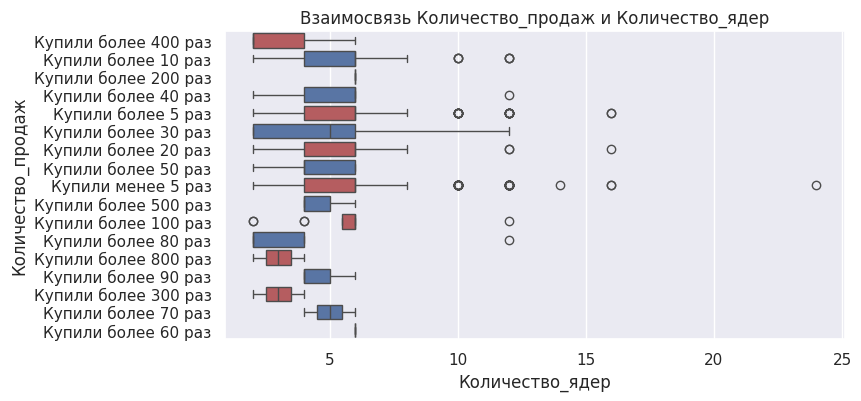

In [ ]:
sns.boxplot(y='Количество_продаж', x='Количество_ядер', data=df_copy, palette=['r', 'b'])
plt.title('Взаимосвязь Количество_продаж и Количество_ядер')
plt.show()

In [ ]:
# Так как нам необходимо оценить зависимость популярности компьютерной сборки от комплектующих, ограничим параметр "Количество продаж" тремя максимальными значениями.
# df_copy.Количество_продаж.value_counts()[:3]
df3 = df_copy.groupby('Количество_продаж')['Количество_продаж'].count().sort_values(ascending=False)[:3]
df3

,Количество_продаж
Количество_продаж,
Купили менее 5 раз,441
Купили более 5 раз,137
Купили более 10 раз,93


In [ ]:
df_3 = df_copy.drop(df_copy[df_copy['Количество_продаж'] == 'Купили более 90 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 800 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 80 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 70 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 60 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 50 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 500 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 40 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 400 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 30 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 300 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 20 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 200 раз'].index)
df_3 = df_3.drop(df_3[df_3['Количество_продаж'] == 'Купили более 100 раз'].index)

<ipython-input-25-c87f6dc75f7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Количество_ядер', data=df_3, palette=['r', 'b', 'g'])


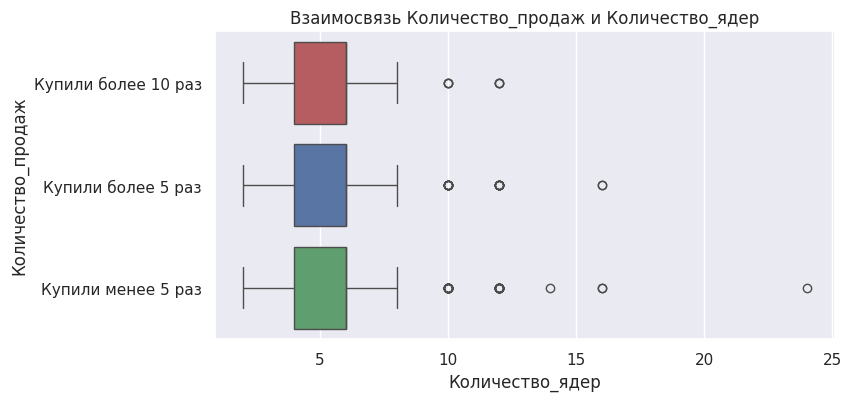

In [ ]:
# Так как нам необходимо оценить зависимость популярности компьютерной сборки от комплектующих, ограничим параметр "Количество продаж" тремя максимальными значениями.
sns.boxplot(y='Количество_продаж', x='Количество_ядер', data=df_3, palette=['r', 'b', 'g'])
plt.title('Взаимосвязь Количество_продаж и Количество_ядер')
plt.show()

In [ ]:
# Как видим из графика три наиболее популярные сборки идентичны в своем отношении к количеству ядер

In [ ]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Купили более 10 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Количество_ядер']))
print('Купили более 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Количество_ядер']))
print('Купили менее 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Количество_ядер']))

Купили более 10 раз ShapiroResult(statistic=0.8574391835929104, pvalue=5.3523914798742595e-08)
Купили более 5 раз ShapiroResult(statistic=0.860565135333841, pvalue=4.911207643081618e-10)
Купили менее 5 раз ShapiroResult(statistic=0.8320278142381635, pvalue=3.531092830102298e-21)


In [ ]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [ ]:
# Проверим связь количества продаж и количества ядер процессора с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Количество_ядер'],df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Количество_ядер'])

MannwhitneyuResult(statistic=5368.5, pvalue=0.032640630852008704)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Количество_ядер'],df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Количество_ядер'])

MannwhitneyuResult(statistic=18707.0, pvalue=0.16132749464039353)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Количество_ядер'],df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Количество_ядер'])

MannwhitneyuResult(statistic=32338.0, pvalue=0.1899129225356777)

In [ ]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие является статистически не значимым.
# Соответственно, количество продаж не отличается в зависимости от количества ядер.

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2. Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака), в т.ч. о нормальности распределения на основании теста Шапиро-Уилка.
3. О средних величинах (как распределена медиана).
4. О значимости взаимосвязи признаков.

**Выводы:**
1. По боксплотам отсутствие взаимосвязи между признаками очевидна, т.к. распределения идентичны, а медианы равны.
2. Рассматриваемые распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение количества ядер - 6.
4. В соответствии с равностью медиан взаимосвязь между признаками является статистически незначимой, т.е. количество продаж не отличается в зависимости от количества ядер.

### Количество_продаж - Объем_ОЗУ_Гб

In [ ]:
df_3.groupby('Количество_продаж')['Объем_ОЗУ_Гб'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество_продаж,,,,,,,,
Купили более 10 раз,93.0,15.462366,9.311703,4.0,8.0,16.0,16.0,64.0
Купили более 5 раз,135.0,19.051852,11.452249,4.0,16.0,16.0,16.0,64.0
Купили менее 5 раз,440.0,18.104545,10.874223,4.0,8.0,16.0,16.0,64.0


<ipython-input-32-a2319ffc904b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Объем_ОЗУ_Гб', data=df_3, palette=['r', 'b', 'g'])


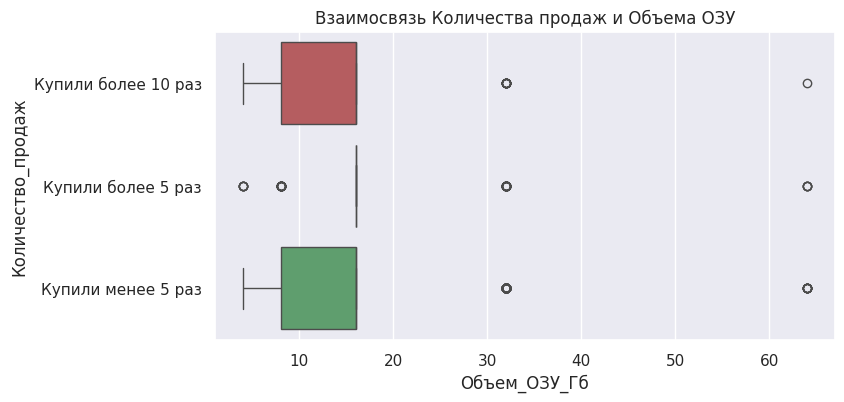

In [ ]:
sns.boxplot(y='Количество_продаж', x='Объем_ОЗУ_Гб', data=df_3, palette=['r', 'b', 'g'])
plt.title('Взаимосвязь Количества продаж и Объема ОЗУ')
plt.show()

In [ ]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Купили более 10 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_ОЗУ_Гб']))
print('Купили более 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_ОЗУ_Гб']))
print('Купили менее 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_ОЗУ_Гб']))

Купили более 10 раз ShapiroResult(statistic=0.7464345660557805, pvalue=2.2484880226546047e-11)
Купили более 5 раз ShapiroResult(statistic=nan, pvalue=nan)
Купили менее 5 раз ShapiroResult(statistic=nan, pvalue=nan)


In [ ]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [ ]:
# Проверим связь Количества продаж и Объема ОЗУ с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_ОЗУ_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_ОЗУ_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_ОЗУ_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_ОЗУ_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_ОЗУ_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_ОЗУ_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Статистически значимые отличия в группах присутствуют.
# Соответственно, Количество продаж отличается в зависимости от Объема ОЗУ.

**Выводы:**
1. По боксплотам наличие взаимосвязи между признаками не очевидна, т.к. распределения частично идентичны, а частично нет, хотя медианы равны.
2. Рассматриваемые распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение объема оперативной памяти - 16 Гб.
4. В соответствии с равностью медиан взаимосвязь между признаками является статистически незначимой, однако связь подтверждается с помощью критерия Манна-Уитни, т.е. количество продаж некоторым образом отличается в зависимости от объема оперативной памяти.

### Количество_продаж - Объем_HDD_Гб

In [ ]:
df_3.groupby('Количество_продаж')['Объем_HDD_Гб'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество_продаж,,,,,,,,
Купили более 10 раз,20.0,675.000000,568.354041,0.0,0.0,1000.0,1000.0,2000.0
Купили более 5 раз,40.0,725.000000,479.716797,0.0,375.0,1000.0,1000.0,2000.0
Купили менее 5 раз,133.0,832.706767,435.978745,0.0,500.0,1000.0,1000.0,4000.0


<ipython-input-38-bf440714c961>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Объем_HDD_Гб', data=df_3, palette=['r', 'b', 'g'],


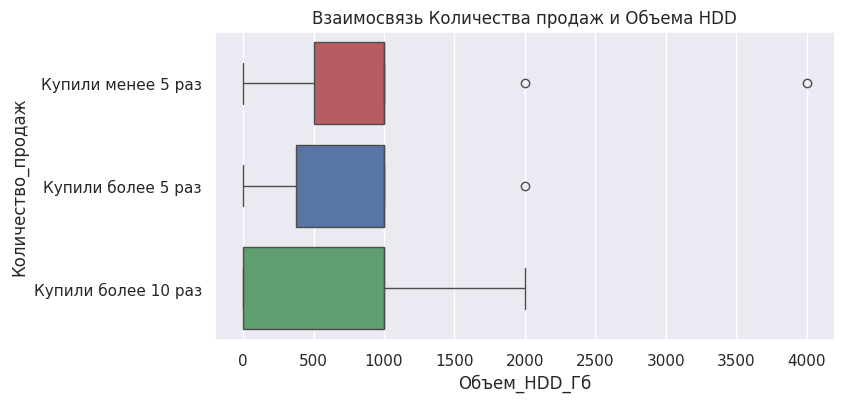

In [ ]:
# с учетом сортировки количества продаж по убыванию
sns.boxplot(y='Количество_продаж', x='Объем_HDD_Гб', data=df_3, palette=['r', 'b', 'g'],
            order=df_3.groupby('Количество_продаж')['Объем_HDD_Гб'].describe().sort_values(by='count', ascending=False).index)
plt.title('Взаимосвязь Количества продаж и Объема HDD')
plt.show()

In [ ]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Купили более 10 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_HDD_Гб']))
print('Купили более 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_HDD_Гб']))
print('Купили менее 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_HDD_Гб']))

Купили более 10 раз ShapiroResult(statistic=nan, pvalue=nan)
Купили более 5 раз ShapiroResult(statistic=nan, pvalue=nan)
Купили менее 5 раз ShapiroResult(statistic=nan, pvalue=nan)


In [ ]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [ ]:
# Проверим связь Количества продаж и Объема HDD с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_HDD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_HDD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_HDD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_HDD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_HDD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_HDD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Принимается гипотеза H1.
# Отличия в группах являются статистически значимыми.
# Соответственно, Количество продаж зависит от Объема HDD.

**Выводы:**
1. По боксплотам наличие взаимосвязи между признаками не очевидна, т.к. распределения схожи, а медианы равны.
2. Рассматриваемые распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение объема оперативной памяти - 1000 Гб.
4. В соответствии с равностью медиан взаимосвязь между признаками является статистически незначимой, однако связь подтверждается с помощью критерия Манна-Уитни, т.е. количество продаж некоторым образом отличается в зависимости от объема жесткого диска HDD.

### Количество_продаж - Объем_SSD_Гб

In [ ]:
df_3.groupby('Количество_продаж')['Объем_SSD_Гб'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество_продаж,,,,,,,,
Купили более 10 раз,20.0,368.000000,155.549958,120.0,250.0,500.0,500.0,500.0
Купили более 5 раз,40.0,436.750000,220.365518,120.0,250.0,500.0,500.0,1000.0
Купили менее 5 раз,133.0,432.781955,277.314922,120.0,250.0,500.0,500.0,2000.0


<ipython-input-44-a86b2c1cb23d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Объем_SSD_Гб', data=df_3, palette=['r', 'b', 'g'],


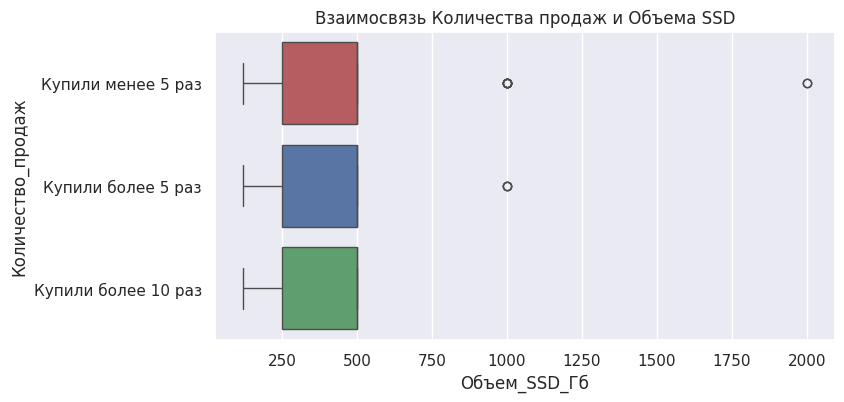

In [ ]:
# с учетом сортировки количества продаж по убыванию
sns.boxplot(y='Количество_продаж', x='Объем_SSD_Гб', data=df_3, palette=['r', 'b', 'g'],
            order=df_3.groupby('Количество_продаж')['Объем_SSD_Гб'].describe().sort_values(by='count', ascending=False).index)
plt.title('Взаимосвязь Количества продаж и Объема SSD')
plt.show()

In [ ]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Купили более 10 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_SSD_Гб']))
print('Купили более 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_SSD_Гб']))
print('Купили менее 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_SSD_Гб']))

Купили более 10 раз ShapiroResult(statistic=nan, pvalue=nan)
Купили более 5 раз ShapiroResult(statistic=nan, pvalue=nan)
Купили менее 5 раз ShapiroResult(statistic=nan, pvalue=nan)


In [ ]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [ ]:
# Проверим связь Количества продаж и Объема SSD с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_SSD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_SSD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Объем_SSD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_SSD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Объем_SSD_Гб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Объем_SSD_Гб'])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Принимается гипотеза H1.
# Отличия в группах являются статистически значимыми.
# Соответственно, Количество продаж зависит от Объема SSD.

**Выводы:**
1. По боксплотам отсутствие взаимосвязи между признаками очевидно, т.к. распределения идентичны, а медианы равны.
2. Рассматриваемые распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение объема оперативной памяти - 500 Гб.
4. В соответствии с равностью медиан взаимосвязь между признаками является статистически незначимой, однако связь подтверждается с помощью критерия Манна-Уитни, т.е. количество продаж некоторым образом отличается в зависимости от объема жесткого диска SSD.

### Количество_продаж - Цена

In [ ]:
df_copy.Цена_руб.describe()

,Цена_руб
count,3434.000000
mean,66613.949039
std,30359.773170
min,10805.000000
25%,39990.000000
50%,66715.000000
75%,83734.750000
max,161021.000000


In [ ]:
df_3.groupby('Количество_продаж')['Цена_руб'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество_продаж,,,,,,,,
Купили более 10 раз,93.0,45060.913978,26584.858265,12500.0,25393.0,36413.0,55000.0,153861.0
Купили более 5 раз,137.0,53838.715328,29033.375677,18156.0,33274.0,44160.0,72443.0,160066.0
Купили менее 5 раз,441.0,58943.619048,33127.686554,11540.0,32568.0,50049.0,77680.0,161021.0


In [ ]:
df_3.Цена_руб.describe()

,Цена_руб
count,3308.000000
mean,67409.223700
std,30307.811553
min,11540.000000
25%,41219.750000
50%,67573.000000
75%,84000.000000
max,161021.000000


<ipython-input-54-3c938c368e3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Количество_продаж', x='Цена_руб', data=df_3, palette=['r', 'b', 'g'])


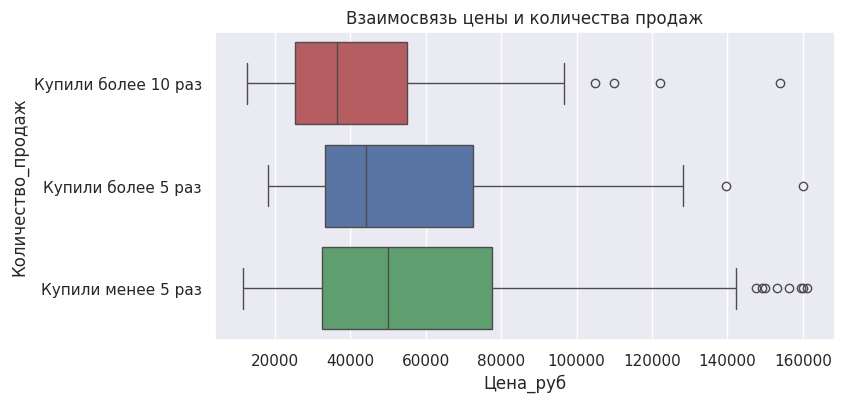

In [ ]:
sns.boxplot(y='Количество_продаж', x='Цена_руб', data=df_3, palette=['r', 'b', 'g'])
plt.title('Взаимосвязь цены и количества продаж')
plt.show()

In [ ]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Купили более 10 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Цена_руб']))
print('Купили более 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Цена_руб']))
print('Купили менее 5 раз', stats.shapiro(df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Цена_руб']))

Купили более 10 раз ShapiroResult(statistic=0.8634796144984306, pvalue=9.010474714748826e-08)
Купили более 5 раз ShapiroResult(statistic=0.8952379474747912, pvalue=2.286163799888884e-08)
Купили менее 5 раз ShapiroResult(statistic=0.9058047297406147, pvalue=6.732230261328618e-16)


In [ ]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [ ]:
# Проверим связь Количества продаж и цены с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Цена_руб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Цена_руб'])

MannwhitneyuResult(statistic=28079.5, pvalue=0.21252365134494622)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Цена_руб'],
                         df_copy[df_copy['Количество_продаж']=='Купили менее 5 раз']['Цена_руб'])

MannwhitneyuResult(statistic=15182.5, pvalue=8.255064870446803e-05)

In [ ]:
scipy.stats.mannwhitneyu(df_copy[df_copy['Количество_продаж']=='Купили более 5 раз']['Цена_руб'],
                         df_copy[df_copy['Количество_продаж']=='Купили более 10 раз']['Цена_руб'])

MannwhitneyuResult(statistic=7655.5, pvalue=0.009495119652064996)

In [ ]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается, но только у некоторых групп.
# Статистически значимые отличия в группах отсутствуют у некоторых групп.
# Соответственно, Количество продаж у некоторы групп зависит от цены, у некоторых не зависит.

**Выводы:**
1. По боксплотам просматриваются взаимосвязи между признаками, т.к. распределения различны и медианы различны.
2. Рассматриваемые распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение цены - 66715 руб., однако медианное значение цены трех наиболее популярных сборок - 67573 руб. Данные значения превышают медианные значения цены трех наиболее популярных сборок в отдельности.
4. В соответствии с не равностью медиан взаимосвязь между признаками является статистически значимой, однако связь подтверждается с помощью критерия Манна-Уитни только между некоторыми группами, т.е. количество продаж отличается в зависимости от цены.

## 4.5. Взаимосвязь категориальных признаков

### Количество продаж - Тип_процессора

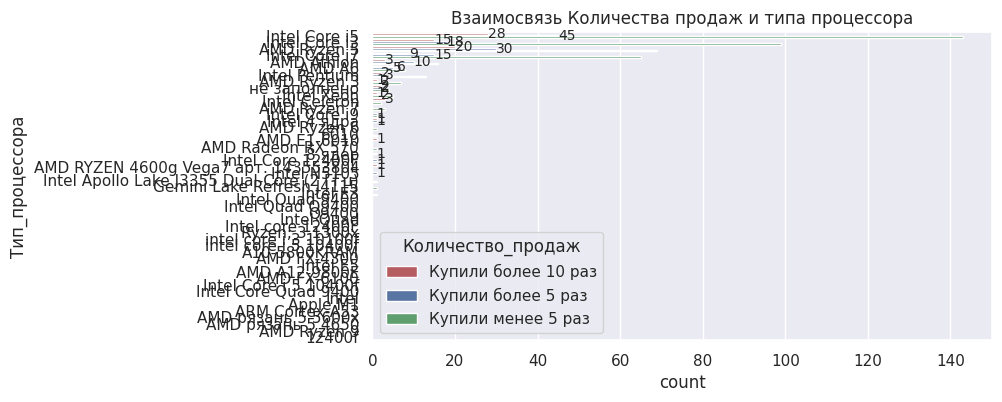

In [ ]:
ax = sns.countplot(data=df_3, y='Тип_процессора', hue='Количество_продаж', palette=['r', 'b', 'g'],
                  order=df_3.groupby('Тип_процессора')['Количество_продаж'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.title('Взаимосвязь Количества продаж и типа процессора')
plt.show()

In [ ]:
# Рассматривая категориальные признаки установлено, что рассматривать значения кроме Топ-5 нет смысла, из-за их незначительности
df_3.Тип_процессора.value_counts()[:5]

,count
Тип_процессора,
Intel Core i5,1107
Intel Core i7,673
Intel Core i3,475
AMD Ryzen 5,467
AMD Athlon,112


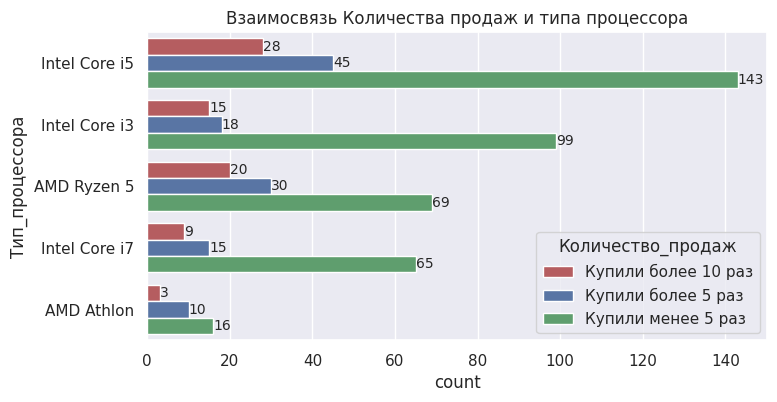

In [ ]:
# поскольку типов процессора достаточно много построим тот же график только для Топ-5 типов процессора
ax = sns.countplot(data=df_3, y='Тип_процессора', hue='Количество_продаж', palette=['r', 'b', 'g'],
                  order=df_3.groupby('Тип_процессора')['Количество_продаж'].describe().sort_values(by='count', ascending=False).index[:5])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.title('Взаимосвязь Количества продаж и типа процессора')
plt.show()

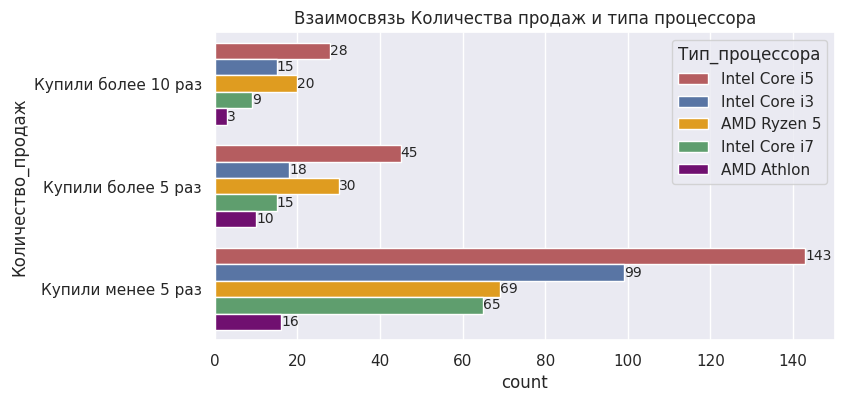

In [ ]:
# Перестроим тот же график поменяв оси местами
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Тип_процессора', palette=['r', 'b', 'orange', 'g', 'purple'],
                  hue_order=df_3.groupby('Тип_процессора')['Количество_продаж'].describe().sort_values(by='count', ascending=False).head(5).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
plt.title('Взаимосвязь Количества продаж и типа процессора')
plt.show()

In [ ]:
# таблица сопряженности
WF=pd.crosstab(df_3['Количество_продаж'],df_3['Тип_процессора']); WF

Тип_процессора,6010,8 ядер,AMD A6,AMD Athlon,AMD E1-6010,AMD RYZEN 4600g Vega7 арт. 143553804,AMD Radeon RX 570,AMD Ryzen 3,AMD Ryzen 5,AMD Ryzen 6,...,Intel Core 12400F,Intel Core i3,Intel Core i5,Intel Core i7,Intel Core i9,Intel E3,Intel N5105,Intel Pentium,Intel Xeon,не заполнено
Количество_продаж,,,,,,,,,,,,,,,,,,,,,
Купили более 10 раз,0,0,6,3,1,1,0,1,20,0,...,0,15,28,9,0,0,0,2,1,2
Купили более 5 раз,0,1,5,10,0,0,0,2,30,0,...,1,18,45,15,1,0,1,3,2,2
Купили менее 5 раз,1,0,8,16,0,0,1,7,69,1,...,0,99,143,65,1,1,0,13,5,4


In [ ]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [ ]:
# Проверим связь Количества продаж и Типа процессора с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 65.56119831362793
degrees of freedom: 48
p-value: 0.04673846305863663



In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, Количество продаж зависит от Типа процессора.

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2. Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3. О значимости взаимосвязи признаков.

**Выводы:**
1. Согласно диаграмм взаимосвязь признаков Количество продаж и Тип процессора присутствует. Распределения признаков не похожи.
2. В Топ-3 категории Количества продаж лидером является тип процессора Intel Core i5, а последующие места могут занимать Intel Core i3 или AMD Ryzen 5, хотя в абсолютных значениях на втором месте по количеству находится Intel Core i7.
3. Взаимосвязь Количества продаж и Типа процессора является статистически значимой, т.е.  Количество продаж зависит от Типа процессора.

### Количество_продаж - Тип_ОЗУ

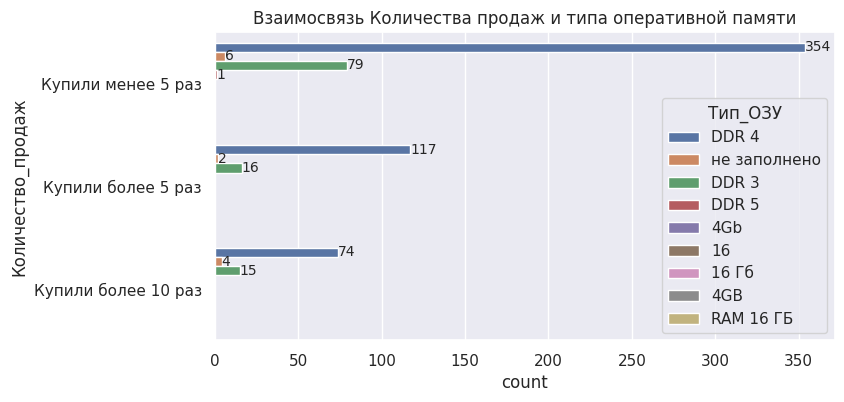

In [ ]:
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Тип_ОЗУ',
                  order=df_3.groupby('Количество_продаж')['Тип_ОЗУ'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
ax.bar_label(ax.containers[6], fontsize=10)
ax.bar_label(ax.containers[7], fontsize=10)
ax.bar_label(ax.containers[8], fontsize=10)
plt.title('Взаимосвязь Количества продаж и типа оперативной памяти')
plt.show()

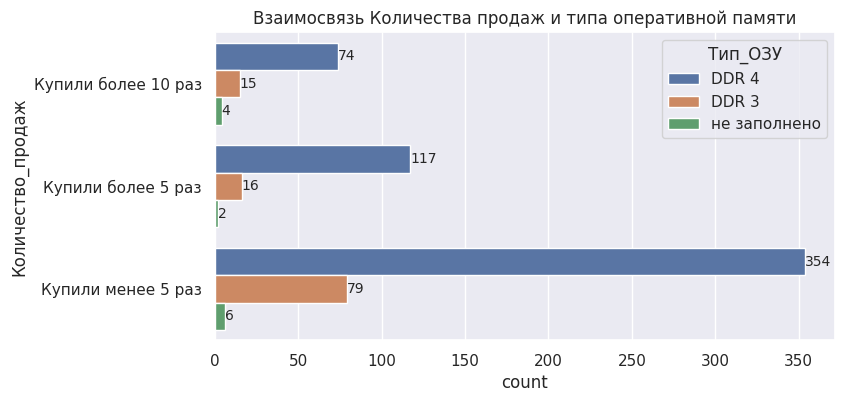

In [ ]:
# график получился неинформативным, перестроим его ограничившись только Топ-3 значений Типа ОЗУ
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Тип_ОЗУ',
                  hue_order=df_3.groupby('Тип_ОЗУ')['Количество_продаж'].describe().sort_values(by='count', ascending=False).head(3).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.title('Взаимосвязь Количества продаж и типа оперативной памяти')
plt.show()

In [ ]:
# таблица сопряженности
WF=pd.crosstab(df_3.Количество_продаж, df_3.Тип_ОЗУ); WF

Тип_ОЗУ,DDR 3,DDR 4,DDR 5,не заполнено
Количество_продаж,,,,
Купили более 10 раз,15,74,0,4
Купили более 5 раз,16,117,0,2
Купили менее 5 раз,79,354,1,6


In [ ]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [ ]:
# Проверим связь Количества продаж и Типа оперативной памяти с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 7.185558006217787
degrees of freedom: 6
p-value: 0.3040274300670273



In [ ]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие не является статистически значимым.
# Соответственно, Количество продаж не зависит от Типа оперативной памяти.

**Выводы:**
1. Согласно диаграмм взаимосвязь признаков Количество продаж и Тип оперативной памяти отсутствует. Распределения признаков не похожи.
2. В Топ-3 категории Количества продаж явным лидером является тип памяти DDR4,  на втором месте, сильно уступая по количеству, находится DDR3. Остальные типы нет смысла рассматривать из-за незначительности.
3. Взаимосвязь Количества продаж и Типа процессора является статистически не значимой, т.е.  Количество продаж не зависит от Типа оперативной памяти.

### Количество_продаж - Видеопроцессор

In [ ]:
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Видеопроцессор', palette=['r', 'b'],
                  order=df_3.groupby('Количество_продаж')['Видеопроцессор'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь Количество_продаж и Видеопроцессора')
plt.show()

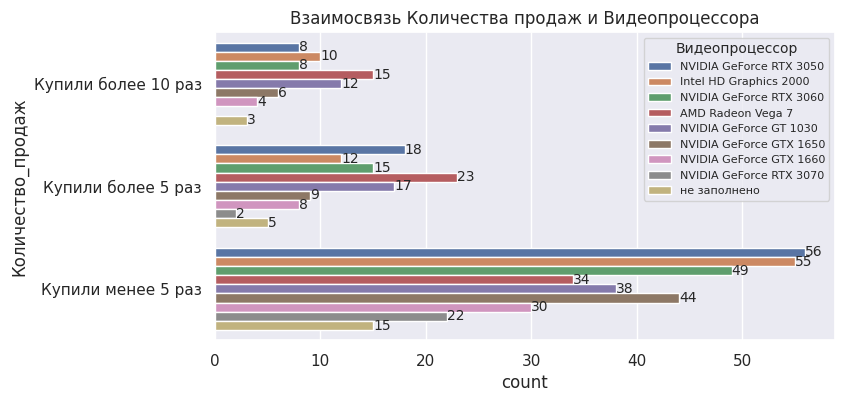

In [ ]:
# график получился громоздкин и нечитаемым, перестроим его ограничившись только Топ-9 значений Видеопроцессора
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Видеопроцессор',
                  hue_order=df_3.groupby('Видеопроцессор')['Количество_продаж'].describe().sort_values(by='count', ascending=False).head(9).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
ax.bar_label(ax.containers[6], fontsize=10)
ax.bar_label(ax.containers[7], fontsize=10)
ax.bar_label(ax.containers[8], fontsize=10)
plt.title('Взаимосвязь Количества продаж и Видеопроцессора')
ax.legend(title='Видеопроцессор', title_fontsize=10, fontsize=8)
plt.show()

In [ ]:
df_3.Видеопроцессор.value_counts()[:9]

,count
Видеопроцессор,
NVIDIA GeForce RTX 3060,594
NVIDIA GeForce RTX 3050,447
NVIDIA GeForce GTX 1650,315
NVIDIA GeForce GTX 1660,265
Intel HD Graphics 2000,205
NVIDIA GeForce RTX 3070,197
AMD Radeon Vega 7,187
NVIDIA GeForce GT 1030,166
NVIDIA GeForce RTX 2060,114


In [ ]:
# таблица сопряженности
WF=pd.crosstab(df_3.Количество_продаж, df_3.Видеопроцессор); WF

Видеопроцессор,AMD,AMD Radeon R5,AMD Radeon RX 470,AMD Radeon RX 550,AMD Radeon RX 570,AMD Radeon RX 580,AMD Radeon RX 6500,AMD Radeon RX 6600,AMD Radeon Vega 3,AMD Radeon Vega 7,...,NVIDIA GeForce RTX 2060,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060,NVIDIA GeForce RTX 3070,NVIDIA GeForce RTX 3080,NVIDIA Quadro T400,Radeon R7 350,intel UHD Graphics 750,rx580,не заполнено
Количество_продаж,,,,,,,,,,,,,,,,,,,,,
Купили более 10 раз,1,6,0,0,0,0,0,0,2,15,...,0,8,8,0,1,0,0,0,0,3
Купили более 5 раз,0,5,1,0,0,0,0,0,5,23,...,1,18,15,2,1,0,0,1,1,5
Купили менее 5 раз,0,8,0,2,1,2,3,2,13,34,...,11,56,49,22,9,1,1,1,0,15


In [ ]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [ ]:
# Проверим связь жанров игр и половой принадлежности пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 134.12484152948284
degrees of freedom: 86
p-value: 0.0006968504133352881



In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 не принимается.
# Данное отличие является статистически значимым.
# Соответственно, Количество продаж зависит от Видеопроцессора.

**Выводы:**
1. Согласно диаграмм взаимосвязь признаков Количество продаж и Видеопроцессор отсутствует. Распределения признаков не похожи.
2. В Топ-3 категории Количества продаж входят 8 видов видеопроцессоров, которые не одинаково представлены в каждой категории.
3. Взаимосвязь Количества продаж и Видеопроцессора является статистически  значимой, т.е. Количество продаж зависит от Видеопроцессора.

### Количество_продаж - Операционная система

<ipython-input-191-8fa9b377d220>:1: UserWarning: 
The palette list has fewer values (2) than needed (32) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Операционная система', palette=['r', 'b'],


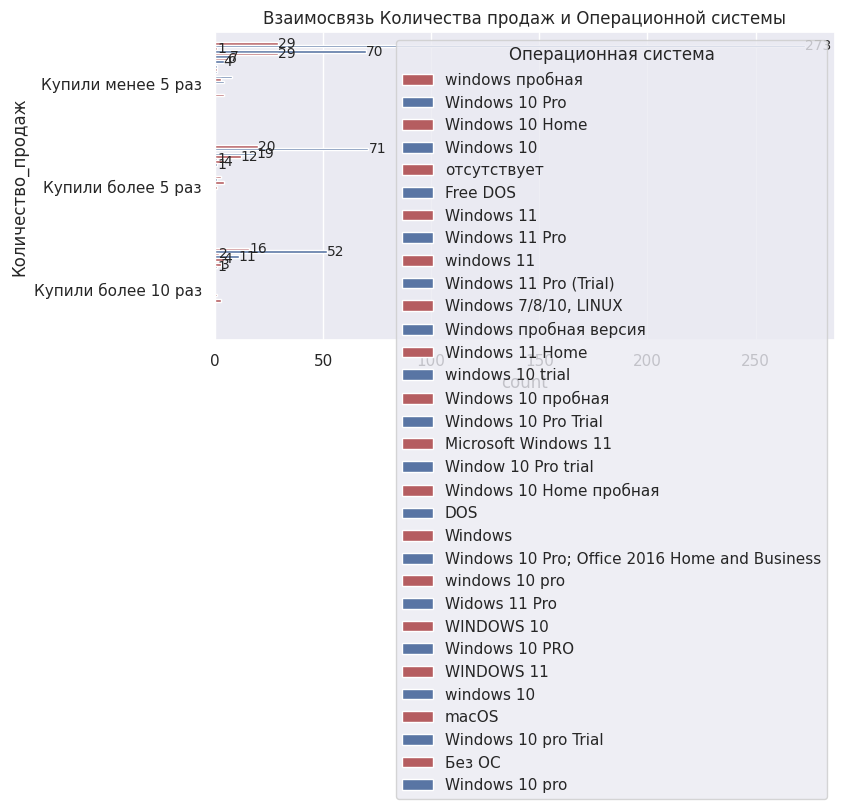

In [ ]:
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Операционная система', palette=['r', 'b'],
                  order=df_3.groupby('Количество_продаж')['Операционная система'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
ax.bar_label(ax.containers[6], fontsize=10)
ax.bar_label(ax.containers[7], fontsize=10)
ax.bar_label(ax.containers[8], fontsize=10)
plt.title('Взаимосвязь Количества продаж и Операционной системы')
plt.show()

In [ ]:
df_3['Операционная система'].value_counts()[:5]

,count
Операционная система,
Windows 10 Pro,1631
Windows 11 Pro,663
Windows 10,373
windows пробная,193
отсутствует,139
Windows 10 Pro Trial,73
Windows 10 Home,46
Free DOS,42
Windows 11,35


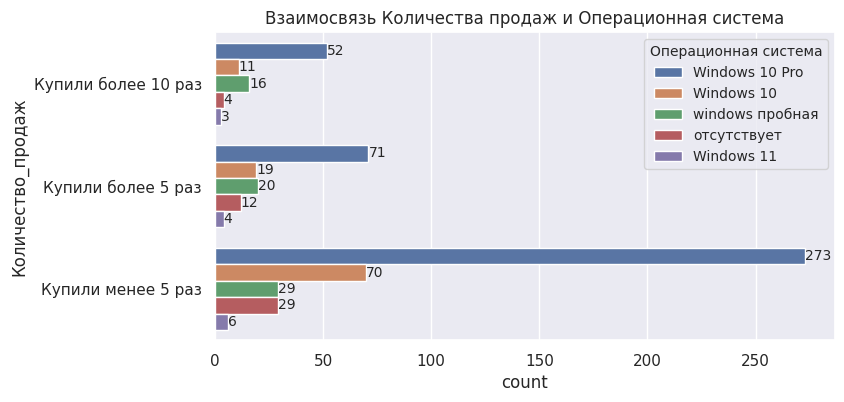

In [ ]:
# график получился громоздкин и нечитаемым, перестроим его ограничившись только Топ-5 значений Операционная система
ax = sns.countplot(data=df_3, y='Количество_продаж', hue='Операционная система',
                  hue_order=df_3.groupby('Операционная система')['Количество_продаж'].describe().sort_values(by='count', ascending=False).head(5).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
plt.title('Взаимосвязь Количества продаж и Операционная система')
ax.legend(title='Операционная система', title_fontsize=10, fontsize=10)
plt.show()

In [ ]:
# таблица сопряженности
WF=pd.crosstab(df_3.Количество_продаж, df_3['Операционная система']); WF

Операционная система,Free DOS,Microsoft Windows 11,Windows,Windows 10,Windows 10 Home,Windows 10 Home пробная,Windows 10 Pro,Windows 10 Pro Trial,Windows 10 пробная,Windows 11,Windows 11 Home,Windows 11 Pro,Windows 11 Pro (Trial),"Windows 7/8/10, LINUX",Windows пробная версия,windows 10 trial,windows пробная,отсутствует
Количество_продаж,,,,,,,,,,,,,,,,,,
Купили более 10 раз,0,0,3,11,2,1,52,0,0,3,0,1,0,0,0,0,16,4
Купили более 5 раз,1,1,0,19,0,0,71,0,4,4,3,1,0,0,0,1,20,12
Купили менее 5 раз,7,0,4,70,1,0,273,4,3,6,0,4,1,1,1,8,29,29


In [ ]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [ ]:
# Проверим связь Количества продаж зависит от Операционной системы с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 68.95831208996876
degrees of freedom: 34
p-value: 0.0003631460226518484



In [ ]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 не принимается.
# Данное отличие является статистически значимым.
# Соответственно, Количество продаж зависит от Операционной системы.

**Выводы:**
1. Согласно диаграмм взаимосвязь признаков Количество продаж и Операционная система отсутствует. Распределения признаков не похожи.
2. В Топ-3 категории Количества продаж явным лидером является операционная система Windows 10 Pro,  на втором и третьем месте, сильно уступая по количеству, находится Windows 10 и Windows Пробная. Так же Топ-5 Операционных систем входят Windows 11 и сборки без операционной системы. Остальные типы нет смысла рассматривать из-за незначительности.
3. Взаимосвязь Количества продаж и Операционной системы является статистически значимой, т.е.  Количество продаж зависит от операционной системы.

# **5. Evaluation / Общие выводы и рекомендации**

***Шпаргалка:***
<br>Стоит собрать основные пункты из промежуточных выводов в итоговый вывод.
<br>При этом следует формулировать выводы так, чтобы они были понятны Заказчику и отвечали на его вопросы!

***Аналитические цели***:
1. Выявить зависимость цены от комплектующих (за исключением мини-ПК и моноблоков);
2. Выявить зависимость популярности единицы товара (количество продаж) от комплектующих (за исключением мини-ПК и моноблоков).

## **I. Общие выводы по датасету:**
1. Был представлен датасет содержащий информацию о товарах категории «Компьютеры и моноблоки», в формате csv, содержащий 4500 строк (объектов) и 16 столбцов (признаков).
2. Предобработка данных включала в себя: исключение нерелевантных признаков и объектов, дубликатов, распаковку и форматирование данных.
3. По итогу предобработки датасет для последующего анализа в формате .csv и .xlsx (3881 объектов, 12 признаков).
4. Дополнительно в процессе анализа была произведена очистка датасета по уровню цены, т.к. товары с ценами до 10 тыс.руб. не являлисб уомпьютерными сборками. Установлено, что признак 'title' (наименование товара) содержит много "мусора" и корректно использовать его не получится без глубокой обработки (очистки). Также некоторые "мусорные" значения выявлены и в других признаках. В количественных признаках они были скорректированы, а в категориальных проигнорированы, т.к. носили единичный характер.
5. В анализе количественных признаков использовалась выборка товаров с ограничением цены (более 10 тыс.руб.), в анализе категориальных признаков использовалась выборка товаров с тремя часто встречаемыми категориями объемов продаж.

## **II. Факторы, влияющие на цену компьютерной сборки**
1. Установлена линейная зависимость цены комьютерной сборки от комплектующих:
* Количество ядер - средняя связь
* Объем оперативной памяти - средняя связь
* Объем HDD - слабая связь
* Объем SSD - слабая связь
при этом Количество ядер оказывает наибольшее влияние на цену компьютерной сборки чем остальные факторы.
2. Наибольшая цена: 235900 руб.(Игровой компьютер i7 13700KF, RTX 4070 Ti 12GB...).
Наименьшая цена: 132 руб., однако данная цена соответствует не компьютеру, а сетевому кабелю для интернета. После дополнительной очистки наименьшая цена оказалась: 10805 руб. (Системный блок OFFICE 120 WB 0710623 J1800/4Gb...).
Средняя цена: 66352 руб.
Медианная цена: 65900 руб.
Распределение признака можно было бы считать нормальным, если не учитывать провал между 40000 руб и 65000 руб и длинный хвост после 110000 руб.

## **III. Факторы, влияющие на количество продаж**
1. **Количество продаж**
Количество уникальных значений по количеству продаж (категорий) составляет 17.
Большая половина значений (примерно 55%) попадает в категорию 'количество продаж менее 5 раз', встретилось 441 раз в выборке.
На втором месте - 'количество продаж от 5 до 10 раз' (137 раз). На третьеи месте - 'количество продаж от 10 до 20 раз' (93 раза). На остальные категории (купили более 20 раз) приходится менее 16% от всех значений.
Самыми "продаваемыми" компьютерными сборками (продано более 800 раз) стали 2 сборки:

1.1. **Компьютер Raskat Intel Pentium G6400/4Gb/120G..**
* цена 36990 руб
* ЦПУ-Intel Pentium G6400 2 ядра
* ОЗУ-4Gb DDR4
* HDD-NaN
* SSD-120Gb
* Видео-Intel HD Graphics 610
* ОС - без операционной системы

1.2. **Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...**
- цена 32900 руб
- ЦПУ-Intel Core i7 4 ядра
- ОЗУ-16Gb DDR3
- HDD-без HDD
- SSD-512Gb
- Видео-NVIDIA GeForce GT 730
- ОС - Windows

Анализ комплектующих второго варианта (Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...) выявил несоответствие данных: данная сборка входит в категорию количества продаж продано "более 800 раз", сборка комплектуется оперативной памятью 16Gb DDR3, однако ОЗУ с типом DDR3 встречается в выборке только 307 раз. Кроме этого цены наиболее продаваемых сборок 32900 руб и 36990 руб, в то время как средняя цена по всем значениям 66352 руб, т.е. превышает в два раза.

2. **Влияние факторов:**
В результате анализа установлены связи количества продаж от:
- Цены,
- Типа процессора,
- Видеопроцессора,
- Операционной системы.
Также количество продаж некоторым образом отличается в зависимости от:
- объема оперативной памяти,
- объема жесткого диска HDD,
- объема жесткого диска SSD.
И отсутствие зависимости от:
- Количества ядер,
- Типа оперативной памяти.

3. **Вариант популярной компьютерной сборки**
- цена 32900 руб
- ЦПУ-Intel Core i7 4 ядра
- ОЗУ-16Gb DDR3
- HDD-без HDD
- SSD-512Gb
- Видео-NVIDIA GeForce GT 730
- ОС - Windows   


## **IV. Рекомендации:**
1. В связи с обнаруженными "полными" дубликатами и аномальными записями провести дополнительную проверку исходных данных и методов их сбора.
2. Рассмотреть возможность избавиться от данных с отсутствующими значениями в столбцах с комплектующими.
3. Дополнительно проанализировать выборку категорий продаж с максимальными значениями (продано более 800...500...400...300 раз) с целью обосновать разницу в градации и выявленные количественные несовпадения.
4. Рассмотреть возможность разложить текстовую информацию в столбце 'title' (наименование) на составляющие, по которым исключить несоответствующие заданию значения и восстановить данные не представленные в столбцах с комплектующими.
5. Рассмотреть вариант разбивки признака цены на группы для понимания провала значений в районе медианных и средних значений.
6. Предложить к использованию наиболее востребованный вариант сборки:
- ЦПУ-Intel Core i5 6 ядер
- ОЗУ-16Gb DDR4
- HDD-1Тb
- SSD-512Gb
- Видео-NVIDIA GeForce RTX 3060
- ОС - Windows 10 Pro   